In [1]:
# Results I can compare to: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
# Best result is 0.21% for MNIST, but they training during weeks with probably better GPU than I have, so I won;t get as good.
# Their MNIST has 60,000 training + 10,000 test, mine is Train on 33600 samples, validate on 8400 samples

from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
%matplotlib inline

# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
xtrain = train.drop('label',axis=1).values.reshape((42000,28,28,1))/ 255.0
# It normalises everything between 0 and 1. 
# 0 dominates since it's mostly a black background which makes that 0-padding is not an issue.
ytrain = train['label'].values
# Maybe need to use trainLabels = np_utils.to_categorical(trainLabels, 10)
xtest = test.values.reshape((28000,28,28,1))/ 255.0

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization

from keras.utils import to_categorical
label = to_categorical(ytrain, num_classes=10)

from sklearn.metrics import accuracy_score
from numpy import argmax
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xtrain, label, test_size=0.2, random_state=42)

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# Other useful layers
from keras.layers.pooling import GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D

# To have parallel layers
# https://stackoverflow.com/questions/43151775/how-to-have-parallel-convolutional-layers-in-keras
from keras.layers import concatenate, Input
from keras.models import Model


Using TensorFlow backend.


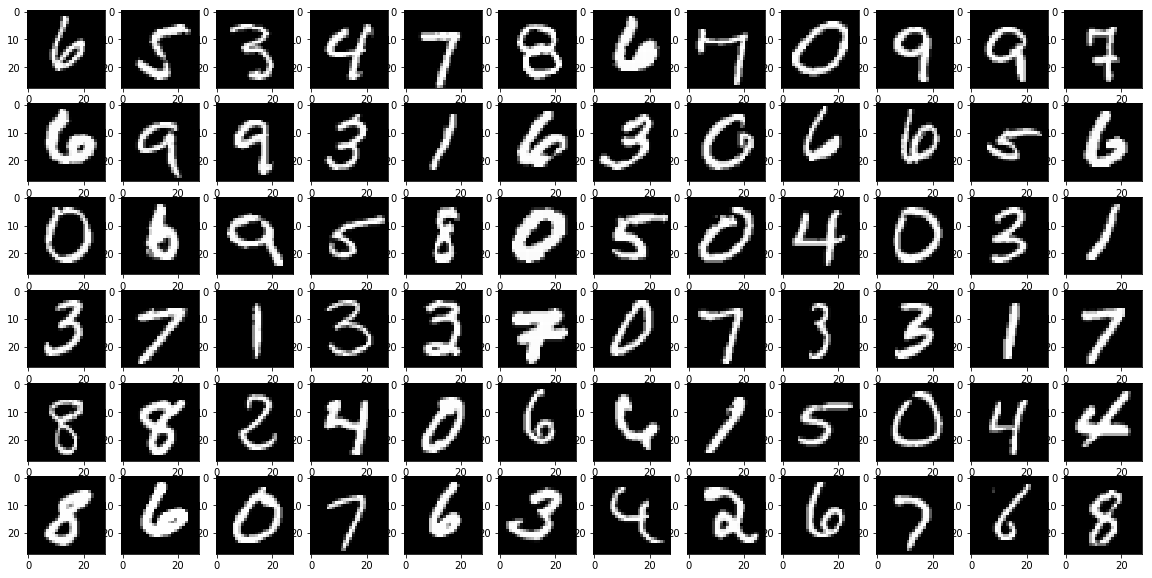

In [45]:
xtr = X_train.reshape(33600,28,28)

fig = plt.figure(figsize=(20,10))
for i in range(72):
    fig.add_subplot(6,12,i+1)
    plt.imshow(xtr[i], cmap='gray')
    
# Interesting features seems to be: vertical line (1, 4, 9) (however it's often inclined towards the right side),
# inclined towards the right side line (7) (sometimes vertical),
# the horizontal line (7, 5, 4) (sometime a bit inclined or curvy), the circle (0, 2, 6, 8, 9), the arc (2, 5, 6, 3)
# Those features are usually between 10-20 pixels in width and height.

# Number are usually centered, but they sometimes touch the bottom or the right.

# Rotation and scale invariance don't seems to be present. However, a partial insentitvity to rotation could be useful for
# the vertical line and the thickness of the lines vary a lot.
# Increasing the number of examples with small rotation and different thickness could help the neuronet to learn those variation.

In [3]:
# Test to compare gpu, cpu

model = Sequential()
model.add(Conv2D(filters=20, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=50, kernel_size=3, padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=10)]

for batchsize in [32, 64, 128, 256]:
    model.fit(X_train, y_train, epochs=1, batch_size=batch_size,verbose=2,callbacks=callbacks,shuffle=True, 
              validation_data=(X_test, y_test))
    
# Another advantage of GPU is that my PC fan make less noise with it.

(42000, 28, 28, 1)
(42000, 10)
Train on 33600 samples, validate on 8400 samples
Epoch 1/1
36s - loss: 0.1768 - acc: 0.9450 - val_loss: 0.0797 - val_acc: 0.9762
Train on 33600 samples, validate on 8400 samples
Epoch 1/1
20s - loss: 0.0814 - acc: 0.9749 - val_loss: 0.0525 - val_acc: 0.9831
Train on 33600 samples, validate on 8400 samples
Epoch 1/1
21s - loss: 0.0657 - acc: 0.9790 - val_loss: 0.0373 - val_acc: 0.9875
Train on 33600 samples, validate on 8400 samples
Epoch 1/1
21s - loss: 0.0540 - acc: 0.9827 - val_loss: 0.0368 - val_acc: 0.9875


Train on 33600 samples, validate on 8400 samples
Epoch 1/100
22s - loss: 0.1240 - acc: 0.9639 - val_loss: 11.6076 - val_acc: 0.1082
Epoch 2/100
16s - loss: 0.0374 - acc: 0.9881 - val_loss: 0.2853 - val_acc: 0.9094
Epoch 3/100
16s - loss: 0.0263 - acc: 0.9909 - val_loss: 0.0500 - val_acc: 0.9825
Epoch 4/100
16s - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0450 - val_acc: 0.9855
Epoch 5/100
16s - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0811 - val_acc: 0.9754
Epoch 6/100
16s - loss: 0.0119 - acc: 0.9962 - val_loss: 0.0601 - val_acc: 0.9839
Epoch 7/100
16s - loss: 0.0121 - acc: 0.9960 - val_loss: 0.0611 - val_acc: 0.9825
Epoch 8/100
16s - loss: 0.0093 - acc: 0.9968 - val_loss: 0.0479 - val_acc: 0.9873
Epoch 9/100
16s - loss: 0.0052 - acc: 0.9982 - val_loss: 0.0658 - val_acc: 0.9830
Epoch 10/100
16s - loss: 0.0126 - acc: 0.9959 - val_loss: 0.0445 - val_acc: 0.9883
Epoch 11/100
16s - loss: 0.0094 - acc: 0.9967 - val_loss: 0.0455 - val_acc: 0.9880
Epoch 12/100
16s - loss: 0.0091 - acc: 0.9970 

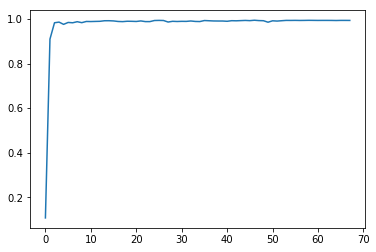

In [15]:
# Test best network of Tensorflowcpu.ipynb with GPU. It gave me 0.9917-0.9926 in val_acc which is very good.

def test(Nfilters1, Nfilters2, Nunits, dropout, batchsize):
    model = Sequential()
    model.add(Conv2D(filters=Nfilters1, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=Nfilters2, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=20)]

    history = model.fit(X_train, y_train, epochs=100, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history['val_acc']
    
history = test(40, 100, 1000, 0, 128)
print(1 - max(history))
plt.plot(history)

# It is 16s rather than 220s. The 2 differences are GPU vs CPU and 128 batch_size rather than 32.

(0.99, 0.994)

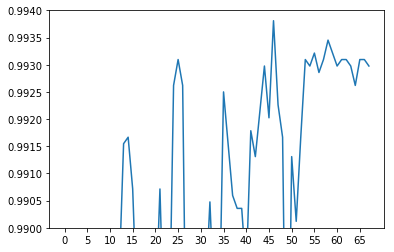

In [26]:
# It took 16 s * 68 =  18.13 min

plt.xticks(np.arange(0, 69, 5.0))
plt.plot(history)
plt.ylim((0.99,0.994))
# Plot start at 0 rather than 1, so 25 on plot is 26th epoch, 46 on plot is 47th epoch.
# So the maximum patience needed was between the max at 25 and the max at 46. 47-26-1= 20 which is exactly the patience I used.
# So I got the good patience. I should maybe go higher to be safer. 47 + 21= 68 the last calculation

# At 47, loss: 6.3717e-04 - acc: 0.9999 - val_loss: 0.0358 - val_acc: 0.9938
# So I can get better only by reducing overfitting. Thus increasing dropout.

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
19s - loss: 0.3296 - acc: 0.9048 - val_loss: 11.4504 - val_acc: 0.1082
Epoch 2/100
17s - loss: 0.1248 - acc: 0.9607 - val_loss: 0.5526 - val_acc: 0.8256
Epoch 3/100
17s - loss: 0.0912 - acc: 0.9712 - val_loss: 0.0595 - val_acc: 0.9812
Epoch 4/100
17s - loss: 0.0755 - acc: 0.9767 - val_loss: 0.0526 - val_acc: 0.9839
Epoch 5/100
17s - loss: 0.0677 - acc: 0.9781 - val_loss: 0.0409 - val_acc: 0.9874
Epoch 6/100
17s - loss: 0.0619 - acc: 0.9796 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 7/100
17s - loss: 0.0563 - acc: 0.9817 - val_loss: 0.0448 - val_acc: 0.9852
Epoch 8/100
17s - loss: 0.0510 - acc: 0.9836 - val_loss: 0.0337 - val_acc: 0.9898
Epoch 9/100
17s - loss: 0.0481 - acc: 0.9854 - val_loss: 0.0356 - val_acc: 0.9881
Epoch 10/100
17s - loss: 0.0475 - acc: 0.9846 - val_loss: 0.0330 - val_acc: 0.9896
Epoch 11/100
17s - loss: 0.0435 - acc: 0.9850 - val_loss: 0.0353 - val_acc: 0.9885
Epoch 12/100
17s - loss: 0.0372 - acc: 0.9882 

(0.99, 0.994)

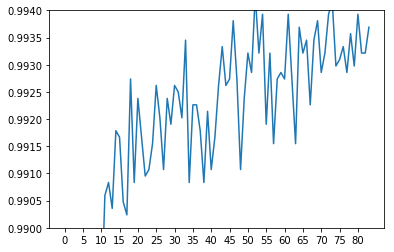

In [27]:
# Try to improve by hand

def test(Nfilters1, Nfilters2, Nunits, dropout, batchsize):
    model = Sequential()
    model.add(Conv2D(filters=Nfilters1, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=Nfilters2, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=30)]

    history = model.fit(X_train, y_train, epochs=100, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history['val_acc']
    
history = test(40, 100, 1000, 0.5, 128)
print(1 - max(history))
plt.xticks(np.arange(0, len(history), 5.0))
plt.plot(history)
plt.ylim((0.99,0.994))

0.994285714399


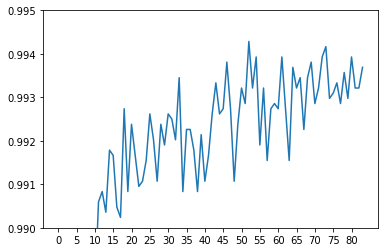

In [33]:
plt.xticks(np.arange(0, len(history), 5.0))
plt.plot(history)
plt.ylim((0.99,0.995))
print(max(history))

# Dropout makes a small improvement and makes that acc is not close to 1 yet, so improvement is still possible.
# I should increase the network and maybe also increase dropout and the max number of epochs.
# I should increase patience, it was still improving.

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
31s - loss: 0.4261 - acc: 0.8743 - val_loss: 13.7697 - val_acc: 0.1082
Epoch 2/1000
18s - loss: 0.1445 - acc: 0.9553 - val_loss: 2.3010 - val_acc: 0.4849
Epoch 3/1000
18s - loss: 0.1065 - acc: 0.9668 - val_loss: 0.0899 - val_acc: 0.9729
Epoch 4/1000
18s - loss: 0.0880 - acc: 0.9720 - val_loss: 0.0468 - val_acc: 0.9854
Epoch 5/1000
18s - loss: 0.0797 - acc: 0.9758 - val_loss: 0.0362 - val_acc: 0.9895
Epoch 6/1000
18s - loss: 0.0700 - acc: 0.9777 - val_loss: 0.0411 - val_acc: 0.9882
Epoch 7/1000
18s - loss: 0.0629 - acc: 0.9790 - val_loss: 0.0409 - val_acc: 0.9870
Epoch 8/1000
18s - loss: 0.0577 - acc: 0.9809 - val_loss: 0.0373 - val_acc: 0.9883
Epoch 9/1000
18s - loss: 0.0528 - acc: 0.9829 - val_loss: 0.0338 - val_acc: 0.9896
Epoch 10/1000
18s - loss: 0.0520 - acc: 0.9843 - val_loss: 0.0363 - val_acc: 0.9893
Epoch 11/1000
18s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0350 - val_acc: 0.9882
Epoch 12/1000
18s - loss: 0.0485 - 

(0.99, 1.0)

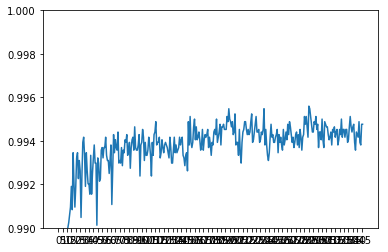

In [2]:
# Save model

def test(Nfilters1, Nfilters2, Nunits, Nunits2, dropout, batchsize):
    model = Sequential()
    model.add(Conv2D(filters=Nfilters1, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=Nfilters2, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(Nunits2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    filename = "SavedModel_A.hdf5"

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filename, monitor='val_acc', save_best_only=True, save_weights_only=True, 
                                                     period=1)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history['val_acc']
    
history = test(40, 100, 1000, 500, 0.5, 128)
print(1 - max(history))
plt.xticks(np.arange(0, len(history), 5.0))
plt.plot(history)
plt.ylim((0.99,1.))

0.995595238095


(0.99, 0.996)

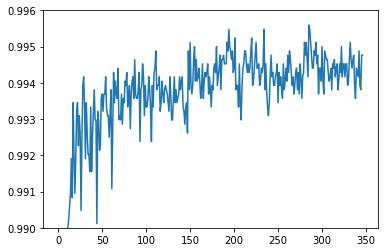

In [6]:
# Next time return full history to be able to plot both traning and validation error.

print(max(history))
#plt.xticks(np.arange(0, len(history), 20.0))
plt.plot(history)
plt.ylim((0.99,0.996))

# Previous error was 0.00571428560075, now it's 0.00440476190476. That's a 23% improvement. It's only the validation result, it
# might be than the test result would not have improved, but it's just that I tested the validation set very often and randomly
# it got a very good result once.

In [3]:
# Use this model on the Kaggle test set

model = Sequential()
model.add(Conv2D(filters=40, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=100, kernel_size=3, padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

filename = 'SavedModel_A.hdf5'
model.load_weights(filename)
ans = argmax(model.predict(xtest), axis=-1)
ans_s = pd.Series(data=ans,index=range(1,28001)).rename('Label')
filename = 'Result'
ans_s.to_csv(path=filename,header=True,index_label='ImageId')

# Result: 0.99329, 0.671% error,  188 mistakes,   my CV result was 0.995595238095

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
47s - loss: 1.4712 - acc: 0.6423 - val_loss: 14.3739 - val_acc: 0.1082
Epoch 2/1000
42s - loss: 0.5247 - acc: 0.8458 - val_loss: 9.3082 - val_acc: 0.1143
Epoch 3/1000
41s - loss: 0.3463 - acc: 0.8935 - val_loss: 0.7801 - val_acc: 0.8154
Epoch 4/1000
42s - loss: 0.2692 - acc: 0.9186 - val_loss: 0.2302 - val_acc: 0.9342
Epoch 5/1000
42s - loss: 0.2258 - acc: 0.9282 - val_loss: 0.1372 - val_acc: 0.9576
Epoch 6/1000
41s - loss: 0.1981 - acc: 0.9379 - val_loss: 0.1469 - val_acc: 0.9556
Epoch 7/1000
42s - loss: 0.1790 - acc: 0.9449 - val_loss: 0.1131 - val_acc: 0.9665
Epoch 8/1000
41s - loss: 0.1670 - acc: 0.9479 - val_loss: 0.1401 - val_acc: 0.9593
Epoch 9/1000
42s - loss: 0.1593 - acc: 0.9508 - val_loss: 0.0859 - val_acc: 0.9746
Epoch 10/1000
41s - loss: 0.1533 - acc: 0.9518 - val_loss: 0.0868 - val_acc: 0.9744
Epoch 11/1000
42s - loss: 0.1518 - acc: 0.9545 - val_loss: 0.0643 - val_acc: 0.9804
Epoch 12/1000
42s - loss: 0.1424 - 

(0.99, 1.0)

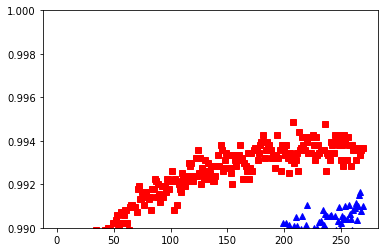

In [5]:
# Try a bigger model with more dropout

def test(Nfilters1, Nfilters2, Nunits, Nunits2, dropout, batchsize,filename):
    model = Sequential()
    model.add(Conv2D(filters=Nfilters1, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=Nfilters2, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(Nunits2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filename, monitor='val_acc', save_best_only=True, save_weights_only=True, 
                                                     period=1)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    return history.history
    
history = test(80, 200, 2000, 1000, 0.8, 128,"SavedModel_B.hdf5")
print(max(history['val_acc']), 1 - max(history['val_acc']))
xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'rs', xaxis, history['acc'], 'b^')
plt.ylim((0.99,1.))

In [ ]:
# On the validation set, it's less good than the previous result.

In [8]:
def testEvaluate(Nfilters1, Nfilters2, Nunits, Nunits2, dropout):
    model = Sequential()
    model.add(Conv2D(filters=Nfilters1, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=Nfilters2, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(Nunits2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    filename = 'SavedModel_B.hdf5'
    model.load_weights(filename)
    ans = argmax(model.predict(xtest), axis=-1)
    ans_s = pd.Series(data=ans,index=range(1,28001)).rename('Label')
    filename = 'ResultB'
    ans_s.to_csv(path=filename,header=True,index_label='ImageId')
    
testEvaluate(80, 200, 2000, 1000, 0.8)

# I got 0.99214 on Kaggle. It's not surprising since my validation result was less good.

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
14s - loss: 0.3336 - acc: 0.8946 - val_loss: 0.1070 - val_acc: 0.9682
Epoch 2/1000
12s - loss: 0.1668 - acc: 0.9491 - val_loss: 0.0721 - val_acc: 0.9792
Epoch 3/1000
12s - loss: 0.1348 - acc: 0.9597 - val_loss: 0.0761 - val_acc: 0.9773
Epoch 4/1000
12s - loss: 0.1153 - acc: 0.9648 - val_loss: 0.0730 - val_acc: 0.9777
Epoch 5/1000
13s - loss: 0.1035 - acc: 0.9675 - val_loss: 0.0506 - val_acc: 0.9845
Epoch 6/1000
13s - loss: 0.1024 - acc: 0.9701 - val_loss: 0.0559 - val_acc: 0.9848
Epoch 7/1000
12s - loss: 0.0896 - acc: 0.9725 - val_loss: 0.0636 - val_acc: 0.9815
Epoch 8/1000
12s - loss: 0.0844 - acc: 0.9743 - val_loss: 0.0640 - val_acc: 0.9820
Epoch 9/1000
12s - loss: 0.0911 - acc: 0.9736 - val_loss: 0.0847 - val_acc: 0.9779
Epoch 10/1000
12s - loss: 0.0852 - acc: 0.9749 - val_loss: 0.0599 - val_acc: 0.9818
Epoch 11/1000
12s - loss: 0.0805 - acc: 0.9760 - val_loss: 0.0491 - val_acc: 0.9863
Epoch 12/1000
12s - loss: 0.0833 - a

(0.99, 1.0)

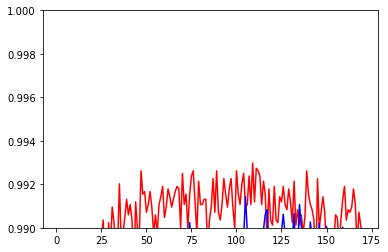

In [10]:
# Use ELU

def test(Nfilters1, Nfilters2, Nunits, Nunits2, dropout, batchsize,filename):
    model = Sequential()
    model.add(Conv2D(filters=Nfilters1, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='elu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=Nfilters2, kernel_size=3, padding="same", activation='elu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='elu'))
    model.add(Dropout(dropout))
    model.add(Dense(Nunits2, activation='elu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filename, monitor='val_acc', save_best_only=True, save_weights_only=True, 
                                                     period=1)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    return history.history
    
history = test(40, 100, 1000, 500, 0.5, 128,"SavedModel_C.hdf5")
print(max(history['val_acc']), 1 - max(history['val_acc']))
xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1.))

In [ ]:
# Thus, it seems than ELU is less good than RELU with Batch Norm

In [1]:
# Advice from https://arxiv.org/pdf/1512.00567.pdf

# In general the representation size should gently decrease from the inputs to the outputs before reaching the final 
# representation used for the task at hand.

# It is often good to reduce the dimension of the input to get faster learning. There is usually a strong correlation between 
# adjacent units, so we are not loosing much information during dimension reduction.
# One way they do dimension reduction is with 1x1 convolution layer with less channel than on the previous layer.
# 1x1 is a feature transformation which is coordinate independant. Some say it is good to have 1x1 layer before or after any
# other layer (like in GoogLeNet).

# Balance the width and depth of the network. Optimal performance of the network can be reached by balancing the number of 
# filters per stage and the depth of the network. Increasing both the width and the depth of the network can contribute to higher 
# quality networks. However, the optimal improvement for a constant amount of computation can be reached if both are increased in 
# parallel. The computational budget should therefore be distributed in a balanced way between the depth and width of the network.

# It's usually better to have 2 3X3 convolution than a 5x5 convolution. Sometimes it is better to have 1xn followed by nx1.
# In this paper, they use 7x1 and 1x7 layers.
# By doing a succession 3x3 without padding (valid), one does the equivalent of a bigger convolution with less cost.
# 3x3 3x3 ~ 5x5, 3x3 3 times ~ 7x7 etc.

# It is good to increase the number of filters by multiplying by a constant at each convolutional layer. They say in GoogLeNet, 
# it's around 1.5

# Grid reduction is done by going from d x d x k (k is the number of filters) to d/2 x d/2 x 2k. It should not be done in serie
# as having an intermediate step of d x d x 2k is a waste of resources and an intermediate step of d/2 x d/2 x k is a 
# botleneck. A way to do that is to do a conv and a pool in parallel (both stride 2) and then concatenate them. 

# It's good to give choice in parallel to the network, like having in parallel 1x1, 1x1 3x3, 1x1 3x3 3x3 and max_pool

In [ ]:
# Advice from http://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf

# Bayesan optimization is done by picking parameters from a random distribution and then evolving this
# distribution according to which changes produce an improvement.
# Bayesan optimization is useful when computing the function takes a long time (as when we are
# optimizing hyperparameter of a neuronet) so it's better to use all the available information and do
# some calculation to find the next point to try rather than going randomly, with a grid search, or
# with something like gradient descent. 
# Gradient descent is good to find the parameters as it is a higly multidimension convex problem for
# which each calculation is very fast.

# Usually one assume that the function to optimize (the validation accuracy for example) in function
# of the hyperparameter is a multivariate gaussian.
# The multivariate gaussian is defined by it's covariance function. One must make some assumptions
# about it.

# However, for machine learning, one wants to optimize on the expected improvement per second rather
# than just the expected improvement.

# ________________________________________________________________________________
# Read also: https://www.iro.umontreal.ca/~bengioy/cifar/NCAP2014-summerschool/slides/Ryan_adams_140814_bayesopt_ncap.pdf

# One can use: https://github.com/HIPS/Spearmint
# Or whetlab

# There are many softwares to optimize parameters including hyperopt and spearmint.

In [2]:
# To have parallel network follow: 
# https://stackoverflow.com/questions/43151775/how-to-have-parallel-convolutional-layers-in-keras
# It works by using concatenate(): merged = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
# I can use that to have both average pooling and max pooling or to do inception modules.

In [ ]:
# Should I use pooling or stride = 2
# Read https://arxiv.org/pdf/1412.6806.pdf     2015
# Originially, CNN were sucession of convolution - pooling, followed by a small number of dense.
# They were large, regularised by dropout and had relu activation.
# In 2014, the top entry in the ImageNet competition changed that by having many convolution between
# each pooling and by doing convolution and pooling at different scale in parallel in the same layer.

# This paper shows that they can achieve state of the art performance while using only convolution
# with mostly stride 1 and sometimes stride 2, and relu.

# They say that pooling is just a special kind of convolution where activation is p-norm (p->infinity
# for max pooling) for which there is no learned parameters. A normal convolution can actually be
# better.

# Other tips: Replace fully-connected layers by 1x1 convolution if the object we want to recognize
# can be contained by the top-most convolution. This lead to prediction of object classes at its
# position (not sure it's useful for MNIST, since the position is always centered).
# They actually use global averaging in their network for CIFAR which is a kind of pooling layer.
# They use it after two 1x1 convolution which follow 2 3x3 following 2 5x5 convolution.

# For CIFAR-10, doing 1x1 convolution followed by average pooling is better than dense by 0.5%-1%.
# They have 9 models
# A: simplest
# B: add 1x1 convolution after each convolution
# C: replace all 5x5 conv by 3x3 conv.
# Each of them has 4 variants:
# 0: Every 2 conv, there is a max-pool.
# 1: Half the conv have stride 2.
# 2: Every 3 conv, there is a max-pool. This variant has 3 conv for each 2 conv of variant 0 and 1.
# 3: A third of conv have stride 2. This variant has 3 conv for each 2 conv of variant 0 and 1.
# They use 3x3 with stride=2 after 2 3x3 conv rather than max-pooling.

# Result: C3 and B3 are the best, C2 and B2 are slightly worse. Then, it's C0. Then, A2, A3, B0, C1.
# B1 is significantly worse. A0, A1 are very bad.
# So it's seems than having only 3x3 and 1x1 (C) is good.
# For max-pool, 0-1 and 2-3 are the same network with and without max-pool. 0 is better than 1, but
# 3 is better than 2. So it's seems than max-pool is bad when we have a lot of convolution, but good
# when we have a large number of them.
# Adding a convolution give good result, so one should always look if adding conv can help his network.

# They use 0.2 dropout after input and 0.5 after each max-pool or stride=2 conv.

In [ ]:
# Advice from https://www.topbots.com/14-design-patterns-improve-convolutional-neural-network-cnn-architecture/

# Good networks have many paths like Resnet (might be too expansive for me though)
# https://arxiv.org/pdf/1605.07648.pdf
# https://arxiv.org/pdf/1605.07146.pdf

# Increase symmetry
# In a CNN, downsample and increase channels progressively from input to output.
# Downsample and channel increase should be simultaneous, for example by concatening two pooling.
# Use dropout or drop-path.
# Use noise and random rotation to increase training data.
# Use batch norm.
# Combine path by summation or by maxout. Maxout can incorporate scale invariance if each branch has
# a different sized kernel.
# Use pre-trained network.
# Create new path in a network and freeze the previous path so that the new path learn to correct it.
# Use cyclical learning rate rather than adaptative since adaptative is computationally expensive.

# Can use ELU rather than Relu with batch normalization. It has a lower computational complexity.
# https://arxiv.org/pdf/1511.07289.pdf




# Advice from https://calculatedcontent.com/2017/06/16/normalization-in-deep-learning/
# Batch Normalization is great for CNNs and RNNs but not for MLPs. 
# They say it's the defacto standard for CNNs and RNNs.
# It makes them easier to train by daming oscillation in the distribution of activations.
# There is a new activation SELU which makes self-normalization and allow for deep MLPs.
# SELU(x) = If x>0: lambda x, else: lambda alpha (Exp[x] - 1)
# Same as ELU but multiplied with lambda.

# Batch norm normalize their input with a mean 0 and variance 1 on a mini-batch.
# Then it scale and shift their input with learned parameters.
# So the average scale and distance from mean are learned rather than taken at is. 
# Batch norm replace norm constraints and has faster convergence.
# However, batch norm slows down Back propagation since it takes time to compute it.

# Selu replace batch norm and is faster. However, it needs a spacial initialization and a modified
# version of dropout.

# SELU is useful for big MLP. I can use BatchNorm for CNN. 
# It is agreed by most people that it is better to put it between relu and dropout in opposition of
# what said the paper which presented it.
# However, I should probably not have it in the Dense part.

# Some results show that it is better to keep mean at zero and variance to 1 rather than learn one.
# I need:
BatchNormalization(center=False, scale=False)

# However, it might be better to use Elu or Selu.



In [11]:
# If we look at the images, one can see that the number are in patch of around 20x20 for the 0 for example and
# 20x3 for the 1. However the 1 can also be rotated and take a square of 20x20. So it would be useful to have 20x20 convolution
# realized by 3x3 and then a max_pool since there is one 20x20 filters that contain all of the number. 
# The number of filters should be kept constant and be significantly larger than 10 to get the different shape of each number.

def test(Nfilters, Nunits):
    # number of paramater for 3x3 is 9*Number_filters*Previous_number_filters.
    # For a 5x5, it would be 25*Number_filters*Previous_number_filters which is 25/18 times bigger than 2 3x3 following each 
    # other
    model = Sequential()
    model.add(Conv2D(filters=9, kernel_size=3, padding="same", input_shape=(28, 28, 1),  # 3x3
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,25), kernel_size=3, padding="same", activation='relu'))      # ~5x5
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,49), kernel_size=3, padding="same", activation='relu'))      # ~7x7
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,81), kernel_size=3, padding="same", activation='relu'))      # ~9x9
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,11*11), kernel_size=3, padding="same", activation='relu'))      # ~11x11
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,13*13), kernel_size=3, padding="same", activation='relu'))      # ~13x13
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,15*15), kernel_size=3, padding="same", activation='relu'))      # ~15x15
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,17*17), kernel_size=3, padding="same", activation='relu'))      # ~17x17
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,19*19), kernel_size=3, padding="same", activation='relu'))      # ~19x19
    model.add(BatchNormalization())
    model.add(Conv2D(filters=min(Nfilters,21*21), kernel_size=3, padding="same", activation='relu'))      # ~21x21
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling2D())  # Now there is no spatial dimension, the input is Nfilters.
    model.add(Dense(Nunits, activation='relu')) # number parameter is Nunits*Nfilters
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax')) # number parameter is Nunits*10

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=10)]

    history = model.fit(X_train, y_train, epochs=100, batch_size=128,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    print("Nfilters: "+ str(Nfilters),"error: "+ str(error))
    print("_______________________________________________________________________________")
    return error
    
test(50, 500)

# There are 10 conv layers, but the 3 first are 9, 25, 49 rather than 50, the 2 first are significantly less, so it's like 8.5
# Conv Param: reduced for 2 first so it's ~ 8.5 * 9 * NFilter^2 = 191k, Dense param Nunits*Nfilters = 25 k, so time is dominated
# by conv.

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
106s - loss: 0.2857 - acc: 0.9096 - val_loss: 11.2907 - val_acc: 0.1082
Epoch 2/100
103s - loss: 0.0631 - acc: 0.9804 - val_loss: 0.4300 - val_acc: 0.8651
Epoch 3/100
103s - loss: 0.0470 - acc: 0.9854 - val_loss: 0.1056 - val_acc: 0.9674
Epoch 4/100
749s - loss: 0.0400 - acc: 0.9868 - val_loss: 0.0806 - val_acc: 0.9725
Epoch 5/100
103s - loss: 0.0358 - acc: 0.9888 - val_loss: 0.0977 - val_acc: 0.9693
Epoch 6/100
104s - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0589 - val_acc: 0.9810
Epoch 7/100
104s - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0855 - val_acc: 0.9765
Epoch 8/100
104s - loss: 0.0301 - acc: 0.9901 - val_loss: 0.0550 - val_acc: 0.9835
Epoch 9/100
104s - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0449 - val_acc: 0.9876
Epoch 10/100
104s - loss: 0.0224 - acc: 0.9930 - val_loss: 0.1045 - val_acc: 0.9683
Epoch 11/100
104s - loss: 0.0188 - acc: 0.9939 - val_loss: 0.0400 - val_acc: 0.9880
Epoch 12/100
104s - loss: 0.0234 - 

0.0097619047619047494

In [13]:
# Max val_acc is 0.9902
# 1 - 0.9902 = 0.0098    0.0097619047619047494 is more precise

# total time around 104 s *28 = 48.5 minutes (749 is due to my computer going to sleep)

# I can save time by reducing patience.
# Local max (patience needed to beat it): 4 (1), 6 (1), 9 (1), 11 (5), 17 (never beaten)
# However, it is also possible that I would have gotten a better result with a bigger patience. 

# This new network is not good compare to my previous one! And it takes a long time to train.

In [12]:
# I can use "valid" padding (that is no-padding) since the figure is centered and surrounded by black, so we don't need to add
# some zeroes.
# I can use stride=2 to downsample.
# O = (I - K + P)/S + 1
# O: output size, I = input size, K = filter size, P is the padding, S is the stride.
# Thus, O = I - 2 for stride=1 and O = (I-3)/2+1 = I/2 - 1/2 for stride=2
# 8x8 with S = 2, I/2 - 3
# NxN stride=2 followed by 2x2 -> N+2 x N+2 while if it's followed by 3x3 it's N+4 x N+4.

def test(Nfilters, Nunits, dropoutConv, dropoutEnd, batchsize):
    # number of paramater for 3x3 is 9*Number_filters*Previous_number_filters.
    # For a 5x5, it would be 25*Number_filters*Previous_number_filters which is 25/18 times bigger than 2 3x3 following each 
    # other
    
    # For the 1st conv, Previous_number_filters=1, so
    # 3x3 3x3 = 9 N1 (1+N2)   5x5 = 25 N2     -> 3x3 better only if N1 < 25/9 ~ 2.7   in limit N2/(1+N2)->1
    # 5x5 3x3 = 25 N1 + 9 N1 N2    7x7 = 49 N2 -> 5x5 better only if N1 < 49 N2 / (25 + 9 N2) ~ 49/9 ~ 5.4
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=8, strides=2, padding="valid", input_shape=(28, 28, 1),  
                     # kernel 8x8, total size 11x11, Rep size: 121 Nfilters
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=3, padding="valid", activation='relu'))      # kernel ~12x12, total size 9x9
    model.add(BatchNormalization())                        # Rep size: 81 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=3, padding="valid", activation='relu'))    # kernel ~14x14, total size 7x7 
    model.add(BatchNormalization())                        # Rep size: 49 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=3, padding="valid", activation='relu'))   # kernel ~16x16, total size 5x5    
    model.add(BatchNormalization())                        # Rep size: 25 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=3, padding="valid", activation='relu'))      # kernel ~18x18, total size 3x3 
    model.add(BatchNormalization())                        # Rep size: 9 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(Nunits, activation='relu')) # number parameter is Nunits*Nfilters*9  because the space is 3x3
                                                # We usually want the representation size to be reduced so Nunits < 9*NFilters
                                                # We want it to be gently reduced to 10
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax')) # number parameter is Nunits*10

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=20)]

    history = model.fit(X_train, y_train, epochs=100, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history

# nb parameters: 64 Nfilters + 4 9 Nfilters^2 + Nunits*Nfilters*9 + Nunits*10

history = test(50, 1000, 0.2, 0.5, 132)
print(max(history['val_acc']), 1 - max(history['val_acc']))

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
15s - loss: 0.3781 - acc: 0.8799 - val_loss: 2.6564 - val_acc: 0.3413
Epoch 2/100
8s - loss: 0.1123 - acc: 0.9653 - val_loss: 0.0981 - val_acc: 0.9708
Epoch 3/100
8s - loss: 0.0818 - acc: 0.9752 - val_loss: 0.0773 - val_acc: 0.9751
Epoch 4/100
8s - loss: 0.0680 - acc: 0.9787 - val_loss: 0.0500 - val_acc: 0.9857
Epoch 5/100
8s - loss: 0.0608 - acc: 0.9817 - val_loss: 0.0478 - val_acc: 0.9850
Epoch 6/100
8s - loss: 0.0498 - acc: 0.9848 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 7/100
8s - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0421 - val_acc: 0.9870
Epoch 8/100
8s - loss: 0.0459 - acc: 0.9863 - val_loss: 0.0483 - val_acc: 0.9868
Epoch 9/100
8s - loss: 0.0378 - acc: 0.9884 - val_loss: 0.0452 - val_acc: 0.9870
Epoch 10/100
8s - loss: 0.0386 - acc: 0.9886 - val_loss: 0.0398 - val_acc: 0.9902
Epoch 11/100
8s - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0325 - val_acc: 0.9905
Epoch 12/100
8s - loss: 0.0379 - acc: 0.9882 - val_loss: 

(0.99, 1)

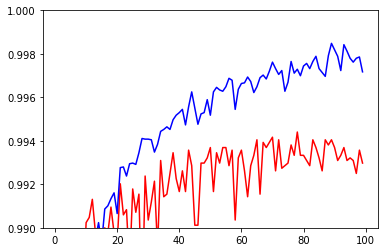

In [14]:
xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
11s - loss: 0.8446 - acc: 0.7314 - val_loss: 3.3353 - val_acc: 0.2902
Epoch 2/100
8s - loss: 0.1997 - acc: 0.9398 - val_loss: 0.1886 - val_acc: 0.9475
Epoch 3/100
8s - loss: 0.1282 - acc: 0.9627 - val_loss: 0.0795 - val_acc: 0.9765
Epoch 4/100
8s - loss: 0.1001 - acc: 0.9722 - val_loss: 0.0595 - val_acc: 0.9826
Epoch 5/100
8s - loss: 0.0857 - acc: 0.9762 - val_loss: 0.0552 - val_acc: 0.9837
Epoch 6/100
8s - loss: 0.0773 - acc: 0.9787 - val_loss: 0.0540 - val_acc: 0.9849
Epoch 7/100
8s - loss: 0.0680 - acc: 0.9808 - val_loss: 0.0447 - val_acc: 0.9867
Epoch 8/100
8s - loss: 0.0604 - acc: 0.9823 - val_loss: 0.0439 - val_acc: 0.9887
Epoch 9/100
8s - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0463 - val_acc: 0.9875
Epoch 10/100
8s - loss: 0.0539 - acc: 0.9841 - val_loss: 0.0377 - val_acc: 0.9900
Epoch 11/100
8s - loss: 0.0516 - acc: 0.9856 - val_loss: 0.0408 - val_acc: 0.9880
Epoch 12/100
8s - loss: 0.0498 - acc: 0.9857 - val_loss: 

(0.99, 1)

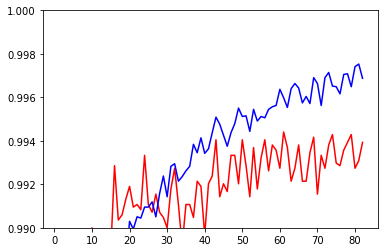

In [17]:
def test(Nfilters, dropoutConv, dropoutEnd, batchsize):
    # number of paramater for 3x3 is 9*Number_filters*Previous_number_filters.
    # For a 5x5, it would be 25*Number_filters*Previous_number_filters which is 25/18 times bigger than 2 3x3 following each 
    # other
    
    # For the 1st conv, Previous_number_filters=1, so
    # 3x3 3x3 = 9 N1 (1+N2)   5x5 = 25 N2     -> 3x3 better only if N1 < 25/9 ~ 2.7   in limit N2/(1+N2)->1
    # 5x5 3x3 = 25 N1 + 9 N1 N2    7x7 = 49 N2 -> 5x5 better only if N1 < 49 N2 / (25 + 9 N2) ~ 49/9 ~ 5.4
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=8, strides=2, padding="valid", input_shape=(28, 28, 1),  
                     # kernel 8x8, total size 11x11, Rep size: 121 Nfilters. It can be good to expand at first, so NFilters > 6
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(1.4 * Nfilters), kernel_size=3, padding="valid", activation='relu'))
    model.add(BatchNormalization())  # kernel ~12x12, total size 9x9 Rep size: 113 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2 * Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())   # kernel ~14x14, total size 7x7  Rep size: 98 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(2.8 * Nfilters), kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())  # kernel ~16x16, total size 5x5 Rep size: 70 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 36 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 18 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 9 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(4 * Nfilters, activation='relu')) # number parameter is 4 Nfilters^2*9  because the space is 3x3
                                                # Rep size: 4 Nfilters
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax')) # number parameters is 40 Nfilters

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=20)]

    history = model.fit(X_train, y_train, epochs=100, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history

history = test(30, 0.2, 0.5, 132)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
16s - loss: 2.1440 - acc: 0.3853 - val_loss: 2.0609 - val_acc: 0.4192
Epoch 2/100
13s - loss: 0.6756 - acc: 0.7824 - val_loss: 0.3532 - val_acc: 0.8857
Epoch 3/100
13s - loss: 0.4014 - acc: 0.8746 - val_loss: 0.1700 - val_acc: 0.9462
Epoch 4/100
13s - loss: 0.2749 - acc: 0.9173 - val_loss: 0.1269 - val_acc: 0.9625
Epoch 5/100
13s - loss: 0.2117 - acc: 0.9359 - val_loss: 0.0958 - val_acc: 0.9712
Epoch 6/100
13s - loss: 0.1758 - acc: 0.9480 - val_loss: 0.0802 - val_acc: 0.9768
Epoch 7/100
13s - loss: 0.1468 - acc: 0.9584 - val_loss: 0.0840 - val_acc: 0.9775
Epoch 8/100
13s - loss: 0.1295 - acc: 0.9621 - val_loss: 0.0672 - val_acc: 0.9829
Epoch 9/100
13s - loss: 0.1162 - acc: 0.9656 - val_loss: 0.0550 - val_acc: 0.9838
Epoch 10/100
13s - loss: 0.1100 - acc: 0.9681 - val_loss: 0.0541 - val_acc: 0.9850
Epoch 11/100
13s - loss: 0.1009 - acc: 0.9699 - val_loss: 0.0570 - val_acc: 0.9845
Epoch 12/100
13s - loss: 0.0923 - acc: 0.9731 -

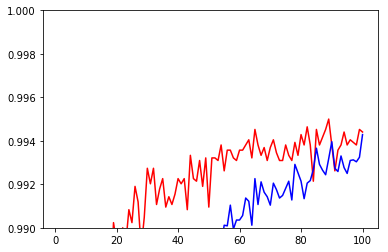

In [18]:
history = test(50, 0.5, 0.6, 132)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.ylim((0.99,1))
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
23s - loss: 1.6571 - acc: 0.5421 - val_loss: 3.0034 - val_acc: 0.2871
Epoch 2/1000
20s - loss: 0.4170 - acc: 0.8703 - val_loss: 0.3537 - val_acc: 0.8898
Epoch 3/1000
20s - loss: 0.2478 - acc: 0.9235 - val_loss: 0.1351 - val_acc: 0.9620
Epoch 4/1000
20s - loss: 0.1786 - acc: 0.9457 - val_loss: 0.1031 - val_acc: 0.9696
Epoch 5/1000
20s - loss: 0.1444 - acc: 0.9572 - val_loss: 0.0769 - val_acc: 0.9793
Epoch 6/1000
20s - loss: 0.1147 - acc: 0.9651 - val_loss: 0.0622 - val_acc: 0.9836
Epoch 7/1000
20s - loss: 0.1064 - acc: 0.9680 - val_loss: 0.0623 - val_acc: 0.9842
Epoch 8/1000
20s - loss: 0.0953 - acc: 0.9716 - val_loss: 0.0550 - val_acc: 0.9845
Epoch 9/1000
20s - loss: 0.0835 - acc: 0.9746 - val_loss: 0.0480 - val_acc: 0.9868
Epoch 10/1000
20s - loss: 0.0766 - acc: 0.9772 - val_loss: 0.0491 - val_acc: 0.9873
Epoch 11/1000
20s - loss: 0.0743 - acc: 0.9779 - val_loss: 0.0511 - val_acc: 0.9865
Epoch 12/1000
20s - loss: 0.0729 - a

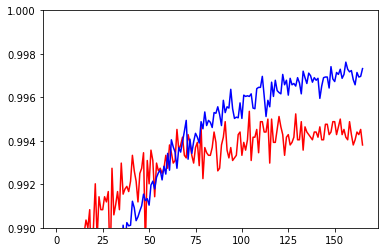

In [21]:
# I want epoch = 1000, patience=60. Previous one stopped too soon.

def test(Nfilters, dropoutConv, dropoutEnd, batchsize):
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=8, strides=2, padding="valid", input_shape=(28, 28, 1),  
                     # kernel 8x8, total size 11x11, Rep size: 121 Nfilters. It can be good to expand at first, so NFilters > 6
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(1.4 * Nfilters), kernel_size=3, padding="valid", activation='relu'))
    model.add(BatchNormalization())  # kernel ~12x12, total size 9x9 Rep size: 113 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2 * Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())   # kernel ~14x14, total size 7x7  Rep size: 98 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(2.8 * Nfilters), kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())  # kernel ~16x16, total size 5x5 Rep size: 70 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 36 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 18 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 9 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(4 * Nfilters, activation='relu')) # number parameter is 4 Nfilters^2*9  because the space is 3x3
                                                # Rep size: 4 Nfilters
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax')) # number parameters is 40 Nfilters

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history

history = test(80, 0.5, 0.6, 132)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.ylim((0.99,1))
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')

In [ ]:
# Example of model which got good score in competition
VGG: 
    input 3-channels size: 224x224
    3 3x3 conv layers with depth 64 and same padding
    max-pool 2x2 size: 112x112
    3 3x3 conv layers with depth 128 and same padding
    max-pool 2x2 size: 56x56
    3 3x3 conv layers with depth 256 and same padding
    max-pool 2x2 size: 28x28
    3 3x3 conv layers with depth 512 and same padding
    max-pool 2x2 size: 14x14
    3 3x3 conv layers with depth 512 and same padding
    max-pool 2x2 size: 7x7
    Fully connected with depth 4096
    Fully connected with depth 1000
So the general idea is to expand by ~20 at the beggining. Then, do batches of 3 3x3 conv (like a 7x7)
Double the number of channels after each max-pool, which makes than the size is reduced by 1/2.
    
    
Resnet:
    Very deep network with identity shortcut. So the deep layers learn only to correct the identity.
    Thus they take care of the residual error. It makes them easier to train.
    It has less parameters than a VGG net even though it is a lot deeper: 152 layers
    
    input 3-channels size: 224
    7x7 conv layer with depth 64 and stride=2, size = 112
    max-pool 2x2 size: 56
    6 3x3 conv with depth 64 (shortcut links every 2 layers)
    3x3 conv with depth 128 and stride=2 (shortcut continue), size = 28
    7 3x3 conv with depth 128 (shortcut continue)
    3x3 conv with depth 256 and stride=2 (shortcut continue), size = 14
    11 3x3 conv with depth 256 (shortcut continue)
    3x3 conv with depth 512 and stride=2 (shortcut continue), size = 7
    5 3x3 conv with depth 512 (shortcut continue)
    Average pooling (conv and the end of shortcut)
    Fully connected with depth 1000
    
The convolutional layers mostly have 3×3 filters and follow two simple design rules: (i) for the same 
output feature map size, the layers have the same number of filters; and (ii) if the feature map size 
is halved, the number of filters is doubled so as to preserve the time complexity per layer.
We perform downsampling directly by convolutional layers that have a stride of 2.

They have less complexity than VGG (3.6 billion FLOPs vs 19.6 FLOPs)

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
19s - loss: 1.2417 - acc: 0.5844 - val_loss: 8.0623 - val_acc: 0.1085
Epoch 2/1000
16s - loss: 0.3532 - acc: 0.8923 - val_loss: 0.3552 - val_acc: 0.9170
Epoch 3/1000
16s - loss: 0.2322 - acc: 0.9317 - val_loss: 0.0932 - val_acc: 0.9792
Epoch 4/1000
16s - loss: 0.1906 - acc: 0.9447 - val_loss: 0.0724 - val_acc: 0.9819
Epoch 5/1000
16s - loss: 0.1652 - acc: 0.9525 - val_loss: 0.0532 - val_acc: 0.9870
Epoch 6/1000
16s - loss: 0.1518 - acc: 0.9569 - val_loss: 0.0484 - val_acc: 0.9886
Epoch 7/1000
16s - loss: 0.1312 - acc: 0.9625 - val_loss: 0.0497 - val_acc: 0.9896
Epoch 8/1000
16s - loss: 0.1212 - acc: 0.9650 - val_loss: 0.0544 - val_acc: 0.9885
Epoch 9/1000
16s - loss: 0.1248 - acc: 0.9650 - val_loss: 0.0465 - val_acc: 0.9888
Epoch 10/1000
16s - loss: 0.1116 - acc: 0.9666 - val_loss: 0.0504 - val_acc: 0.9892
Epoch 11/1000
16s - loss: 0.1059 - acc: 0.9697 - val_loss: 0.0508 - val_acc: 0.9905
Epoch 12/1000
16s - loss: 0.1022 - a

(0.99, 1)

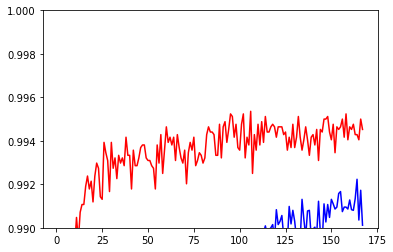

In [22]:
# Try using only 3x3 and max-pool

def test(Nfilters, dropoutConv, dropoutEnd, batchsize):    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=3, padding="valid", input_shape=(28, 28, 1), 
                     activation='relu')) # kernel 3x3, total size 26x26
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="valid", activation='relu'))
    model.add(BatchNormalization())  # kernel ~5x5, total size 24x24
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 12x12
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())   # kernel ~7x7, total size 10x10
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())  # kernel ~9x9, total size 8x8
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 4x4
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(8 * Nfilters, activation='relu'))
    model.add(Dropout(dropoutEnd))
    model.add(Dense(Nfilters, activation='relu'))
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history

history = test(30, 0.2, 0.5, 132)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

In [ ]:
Summary:

0.995595238095 got by Conv3same(40)-Pool-Conv3same(100)-pool-Dense(1000)-Dense(500) with dropout=0.5
18s per epoch, maximum at epoch 287.
The plot show that there is not much change in average between 150 and 350, but there is some peaks of which 287 is the tallest.
That is 37 mistakes
Got 0.99329 at Kaggle.

Increasing number of units and dropout reduced the score and increased the time.

Using ELU rather than Relu-BatchNorm reduced the score to 0.99297619059. It also decreased the time to 12s, so one could use Elu
with a more complex network.

0.994404767241 got by Conv8valid(50)-Conv3valid(50)^4-Dense(1000) with dropout=0.2 for convolution and 0.5 at the end.
8s per epoch, maximum at epoch 78, it stopped because of the 100 limits (rather than 1000 for previous ones)
It is only slightly less than 0.995595238095 and is a lot faster.
Epoch 78/100
8s - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0259 - val_acc: 0.9944

The network Conv8valid(30)-Conv3valid(42)-Conv3valid(60)-Conv3valid(84)-Conv3valid(120)-Conv1valid(60)-Conv1valid(30)-Dense(120) 
with dropout=0.2 for convolution and 0.5 got exactly the same result: 0.994404767241   
That's strange, but it's possible if they got exactly the same number of good result: 8353, that is 47 errors.
8s per epoch, maximum at epoch 61.
Epoch 61/100
8s - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0203 - val_acc: 0.9944
Patience was only 20, I could maybe get better with a higher patience and going to 1000.

Same network with number of kernels multiplied by 5/3 and dropout=0.5 for convolution, 0.6 at the end got 0.995000004768
13s per epoch, maximum at epoch 89. It stopped because of epoch limit so it might have gone higher.
Epoch 89/100
13s - loss: 0.0246 - acc: 0.9932 - val_loss: 0.0171 - val_acc: 0.9950                
                
Same network with number of kernels multiplied by 8/3 and dropout=0.5 for convolution, 0.6 at the end got 0.995357147285 
Probably 1 less good result than my best result.
20s per epoch, maximum at epoch 104.
Epoch 104/1000
20s - loss: 0.0144 - acc: 0.9960 - val_loss: 0.0199 - val_acc: 0.9954
That is 39 mistakes
    So increasing the number of kernels improve the result at the cost of a huge increase in time.

Conv3valid(30)^2-MaxPool-Conv3valid(60)^2-MaxPool-Dense(240)-Dense(30)
16s per epoch, maximum at epoch 106.
Epoch 106/1000
16s - loss: 0.0349 - acc: 0.9886 - val_loss: 0.0331 - val_acc: 0.9954
0.995357147285 is exactly the same result as previously.




Thus a lot of my networks are performing very similarly. I don't think I can significantly improve them without a bigger change.

In [26]:
# Compare batchsize again

def tmp(Nfilters, dropoutConv, dropoutEnd, batchsize):
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=8, strides=2, padding="valid", input_shape=(28, 28, 1),  
                     # kernel 8x8, total size 11x11, Rep size: 121 Nfilters. It can be good to expand at first, so NFilters > 6
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(1.4 * Nfilters), kernel_size=3, padding="valid", activation='relu'))
    model.add(BatchNormalization())  # kernel ~12x12, total size 9x9 Rep size: 113 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2 * Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())   # kernel ~14x14, total size 7x7  Rep size: 98 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(2.8 * Nfilters), kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())  # kernel ~16x16, total size 5x5 Rep size: 70 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 36 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 18 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 9 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(4 * Nfilters, activation='relu')) # number parameter is 4 Nfilters^2*9  because the space is 3x3
                                                # Rep size: 4 Nfilters
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax')) # number parameters is 40 Nfilters

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60)]
    
    history= model.fit(X_train, y_train, epochs=10, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    return max(history.history['val_acc'])

for batchsize in [32, 64, 128, 256, 512]:
    print(batchsize)
    a = tmp(30, 0., 0., batchsize)
    print(a)
    
# 256 seems to be the best in fact. It's faster 6s vs 8s and get a better accuracy after 10 epochs.
# 512 is slightly faster 5s, but doesn't get as good an accuracy after 10 epochs. Obviously it might get better afterwards,
# but in doubt it's better to use 256. Also, it seems more at risk of overfitting.

32
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
25s - loss: 0.2054 - acc: 0.9368 - val_loss: 0.1098 - val_acc: 0.9646
Epoch 2/10
21s - loss: 0.0780 - acc: 0.9754 - val_loss: 0.0703 - val_acc: 0.9787
Epoch 3/10
21s - loss: 0.0548 - acc: 0.9829 - val_loss: 0.0702 - val_acc: 0.9781
Epoch 4/10
21s - loss: 0.0489 - acc: 0.9850 - val_loss: 0.0607 - val_acc: 0.9819
Epoch 5/10
21s - loss: 0.0435 - acc: 0.9860 - val_loss: 0.0852 - val_acc: 0.9754
Epoch 6/10
21s - loss: 0.0348 - acc: 0.9885 - val_loss: 0.0461 - val_acc: 0.9850
Epoch 7/10
21s - loss: 0.0329 - acc: 0.9890 - val_loss: 0.1000 - val_acc: 0.9726
Epoch 8/10
21s - loss: 0.0334 - acc: 0.9896 - val_loss: 0.0569 - val_acc: 0.9829
Epoch 9/10
21s - loss: 0.0256 - acc: 0.9914 - val_loss: 0.0598 - val_acc: 0.9829
Epoch 10/10
21s - loss: 0.0225 - acc: 0.9930 - val_loss: 0.0623 - val_acc: 0.9821
0.985
64
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
15s - loss: 0.2086 - acc: 0.9340 - val_loss: 0.2500 - val_acc: 0.914

C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\__main__.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\__main__.py:38: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
25s - loss: 2.1637 - acc: 0.2124 - val_loss: 2.3571 - val_acc: 0.1086
Epoch 2/1000
7s - loss: 1.7054 - acc: 0.3809 - val_loss: 2.0706 - val_acc: 0.2258
Epoch 3/1000
7s - loss: 1.4225 - acc: 0.4956 - val_loss: 1.0149 - val_acc: 0.6673
Epoch 4/1000
8s - loss: 1.2336 - acc: 0.5758 - val_loss: 0.7169 - val_acc: 0.8307
Epoch 5/1000
7s - loss: 1.1032 - acc: 0.6193 - val_loss: 0.4734 - val_acc: 0.9207
Epoch 6/1000
8s - loss: 1.0114 - acc: 0.6545 - val_loss: 0.3851 - val_acc: 0.9402
Epoch 7/1000
8s - loss: 0.9444 - acc: 0.6724 - val_loss: 0.3006 - val_acc: 0.9593
Epoch 8/1000
8s - loss: 0.8901 - acc: 0.6918 - val_loss: 0.2732 - val_acc: 0.9539
Epoch 9/1000
7s - loss: 0.8528 - acc: 0.7068 - val_loss: 0.2259 - val_acc: 0.9644
Epoch 10/1000
7s - loss: 0.8124 - acc: 0.7255 - val_loss: 0.1964 - val_acc: 0.9711
Epoch 11/1000
8s - loss: 0.7893 - acc: 0.7322 - val_loss: 0.2353 - val_acc: 0.9601
Epoch 12/1000
7s - loss: 0.7745 - acc: 0.7436 

(0.99, 1)

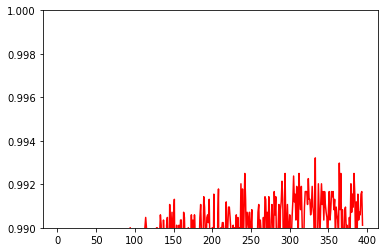

In [17]:
# Try with same rather than valid

# Try with GlobalAveragePooling before fully connected.

# Try with parallel MaxPool and Conv like in inception module
# https://stackoverflow.com/questions/43151775/how-to-have-parallel-convolutional-layers-in-keras

def test(Nfilters, dropoutConv, dropoutEnd, batchsize):    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=3, padding="same", input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())
    
    inp = Input(shape=(28, 28, Nfilters))
    path1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), input_shape=(28, 28, Nfilters))(inp)
    path2 = (Conv2D(filters= Nfilters, kernel_size=3, strides=2, padding="same", activation='relu'
                    , input_shape=(28, 28, Nfilters))(inp))  # It means batch norm is before Conv2D
    ConvPool = Model(input=inp, output=concatenate([path1,path2]))
    model.add(ConvPool)
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())       

    inp2 = Input(shape=(14, 14, 2*Nfilters))
    path12 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), input_shape=(14, 14, 2*Nfilters))(inp2)
    path22 = (Conv2D(filters= Nfilters, kernel_size=3, strides=2, padding="same", activation='relu'
                    , input_shape=(14, 14, 2*Nfilters))(inp2))  # It means batch norm is before Conv2D
    ConvPool2 = Model(input=inp2, output=concatenate([path12,path22]))
    model.add(ConvPool2)            
                
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 4*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 4*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 4*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 4*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 4*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(BatchNormalization())
    model.add(Conv2D(filters= 4*Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(Dropout(dropoutConv))
    model.add(GlobalAveragePooling2D())
    model.add(BatchNormalization())
    model.add(Dense(2 * Nfilters, activation='relu'))
    model.add(Dropout(dropoutEnd))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history

history = test(5, 0.2, 0.5, 256)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\__main__.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\__main__.py:38: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
26s - loss: 1.1349 - acc: 0.6583 - val_loss: 4.7813 - val_acc: 0.1082
Epoch 2/1000
22s - loss: 0.3301 - acc: 0.9315 - val_loss: 7.9222 - val_acc: 0.1082
Epoch 3/1000
22s - loss: 0.2082 - acc: 0.9574 - val_loss: 7.5711 - val_acc: 0.1083
Epoch 4/1000
22s - loss: 0.1570 - acc: 0.9665 - val_loss: 0.9251 - val_acc: 0.7763
Epoch 5/1000
22s - loss: 0.1277 - acc: 0.9735 - val_loss: 0.2136 - val_acc: 0.9465
Epoch 6/1000
22s - loss: 0.1180 - acc: 0.9752 - val_loss: 0.0569 - val_acc: 0.9852
Epoch 7/1000
22s - loss: 0.1036 - acc: 0.9767 - val_loss: 0.0565 - val_acc: 0.9845
Epoch 8/1000
22s - loss: 0.0914 - acc: 0.9792 - val_loss: 0.0753 - val_acc: 0.9830
Epoch 9/1000
22s - loss: 0.0795 - acc: 0.9827 - val_loss: 0.0546 - val_acc: 0.9868
Epoch 10/1000
22s - loss: 0.0771 - acc: 0.9822 - val_loss: 0.0547 - val_acc: 0.9857
Epoch 11/1000
22s - loss: 0.0677 - acc: 0.9843 - val_loss: 0.0779 - val_acc: 0.9808
Epoch 12/1000
22s - loss: 0.0684 - a

(0.99, 1)

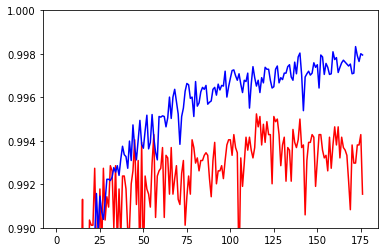

In [18]:
# Should reduce dropout or increase filters, it undertrained.

history = test(20, 0.2, 0.5, 256)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

In [ ]:
# Read https://arxiv.org/pdf/1312.4400.pdf
# Network In Network

# It seems that they are doing 3 1x1 conv after each 3x3 conv. It allow to have more complex features.
# They down sample with max pooling after the 3x3 and 3 1x1 conv.
# They use dropout after each max pooling
# They do that 3 times for all the dataset they used it on including MNIST.

# They use GlobalAveragePooling at the end. They have a nxnxc image where c is the number of class
# and the do GlobalAveragePooling and softmax without any dense layer.

# Linear convolution can only get features which are lineraly separable. One thus need to over
# complete the number of features.

# They got 0.47% at MNIST which is slightly worse than the best at their time of writing (0.45%)




In [4]:
# First conv should be of a scale that allow to see the smallest features. It looks like 7x7 should work fine.
# Then I should have some 1x1 to allow for more complex features. Then maxpool and dropout.
# Then I should have series of 3x3 conv until I get to the order of 20x20 where I get the whole number.
# At the end should do average pooling.

def test(Nfilters, dropout, batchsize):    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=4*Nfilters, kernel_size=7, padding="same", input_shape=(28, 28, 1), 
                     activation='relu')) # kernel 7x7
    model.add(BatchNormalization())
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 14x14
    model.add(Dropout(dropout))  
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=8*Nfilters, kernel_size=3, padding="same", activation='relu')) # kernel ~11x11
    model.add(BatchNormalization())
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 7x7
    model.add(Dropout(dropout))  
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu')) # kernel ~15x15
    model.add(Dropout(dropout))    
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu')) # kernel ~17x17
    model.add(Dropout(dropout))    
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu')) # kernel ~19x19
    model.add(Dropout(dropout))    
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu')) # kernel ~21x21
    model.add(BatchNormalization())
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=10, kernel_size=1, padding="same", activation='relu'))  # 2*Nfilters must be > 10, 
                                                                                     # probably at least 20
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax')) # Since I already have 10 filters, I don't need a dense layer but only a softmax activation.

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    error = 1 - max(history.history['val_acc'])
    
    return history.history

history = test(10, 0., 256)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
42s - loss: 0.6683 - acc: 0.8538 - val_loss: 3.7206 - val_acc: 0.0999
Epoch 2/1000
25s - loss: 0.1047 - acc: 0.9788 - val_loss: 3.4509 - val_acc: 0.1255
Epoch 3/1000
25s - loss: 0.0637 - acc: 0.9856 - val_loss: 2.6429 - val_acc: 0.3314
Epoch 4/1000
25s - loss: 0.0456 - acc: 0.9890 - val_loss: 0.5741 - val_acc: 0.8142
Epoch 5/1000
25s - loss: 0.0352 - acc: 0.9913 - val_loss: 0.0600 - val_acc: 0.9845
Epoch 6/1000
25s - loss: 0.0284 - acc: 0.9929 - val_loss: 0.0597 - val_acc: 0.9825
Epoch 7/1000
25s - loss: 0.0241 - acc: 0.9941 - val_loss: 0.0384 - val_acc: 0.9901
Epoch 8/1000
25s - loss: 0.0211 - acc: 0.9947 - val_loss: 0.0349 - val_acc: 0.9895
Epoch 9/1000
25s - loss: 0.0206 - acc: 0.9945 - val_loss: 0.0481 - val_acc: 0.9856
Epoch 10/1000
25s - loss: 0.0163 - acc: 0.9952 - val_loss: 0.0422 - val_acc: 0.9870
Epoch 11/1000
25s - loss: 0.0143 - acc: 0.9962 - val_loss: 0.0381 - val_acc: 0.9895
Epoch 12/1000
25s - loss: 0.0113 - a

KeyboardInterrupt: 

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
31s - loss: 0.9568 - acc: 0.7145 - val_loss: 5.9256 - val_acc: 0.1082
Epoch 2/1000
27s - loss: 0.1774 - acc: 0.9561 - val_loss: 5.9594 - val_acc: 0.1082
Epoch 3/1000
27s - loss: 0.1121 - acc: 0.9707 - val_loss: 3.3533 - val_acc: 0.2636
Epoch 4/1000
27s - loss: 0.0910 - acc: 0.9749 - val_loss: 0.3005 - val_acc: 0.9111
Epoch 5/1000
27s - loss: 0.0756 - acc: 0.9790 - val_loss: 0.1151 - val_acc: 0.9682
Epoch 6/1000
27s - loss: 0.0666 - acc: 0.9810 - val_loss: 0.0477 - val_acc: 0.9852
Epoch 7/1000
27s - loss: 0.0586 - acc: 0.9831 - val_loss: 0.0479 - val_acc: 0.9865
Epoch 8/1000
27s - loss: 0.0578 - acc: 0.9829 - val_loss: 0.0478 - val_acc: 0.9852
Epoch 9/1000
27s - loss: 0.0464 - acc: 0.9865 - val_loss: 0.0485 - val_acc: 0.9865
Epoch 10/1000
27s - loss: 0.0467 - acc: 0.9859 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 11/1000
27s - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0385 - val_acc: 0.9880
Epoch 12/1000
28s - loss: 0.0394 - a

(0.99, 1)

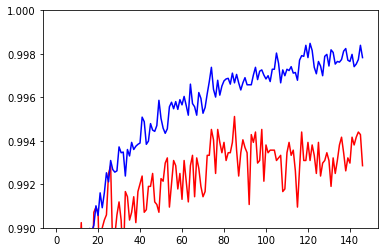

In [5]:
# Without dropout, there's clearly overfitting.

history = test(12, 0.2, 256)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

In [ ]:
New summary

The best result is still
0.995595238095 got by Conv3same(40)-Pool-Conv3same(100)-Pool-Dense(1000)-Dense(500) with dropout=0.5
18s per epoch, maximum at epoch 287.
The plot show that there is not much change in average between 150 and 350, but there is some peaks of which 287 is the tallest.
It's 37 errors.

However this network is close and a lot faster.
The network Conv8valid(30)-Conv3valid(42)-Conv3valid(60)-Conv3valid(84)-Conv3valid(120)-Conv1valid(60)-Conv1valid(30)-Dense(120) 
with dropout=0.2 for convolution and 0.5 got: 0.994404767241 that is 47 errors.
8s per epoch, maximum at epoch 61.
Epoch 61/100
8s - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0203 - val_acc: 0.9944

It seems it should be possible to improve this 2nd network to beat the first, but I didn't succeed to beat my best result.
Increasing the number of kernels and dropout improve the result at the cost of a huge increase in time.
I got 39 mistakes for number of kernels multiplied by 8/3 and dropout=0.5 for convolution, 0.6

I went back to something more similar to my first successful network.
Conv3valid(30)^2-MaxPool-Conv3valid(60)^2-MaxPool-Dense(240)-Dense(30)
16s per epoch, maximum at epoch 106.
Epoch 106/1000
16s - loss: 0.0349 - acc: 0.9886 - val_loss: 0.0331 - val_acc: 0.9954
0.995357147285 that is 39 mistakes.

A more complex network got a sligthly lower result.
Conv3Same(20)-(MaxPool,Conv3SameStide2(20))-(MaxPool,Conv3SameStide2(40))-Conv3valid(80)^6-GlobalAveragePooling-Dense(160)
Epoch 115/1000   0.995238095238   40 mistakes
22s - loss: 0.0134 - acc: 0.9965 - val_loss: 0.0300 - val_acc: 0.9952

In [ ]:
Paper that compare advance in CNN
https://arxiv.org/pdf/1606.02228.pdf
    
Using CaffeNet architecture they've shown that the best activation is Maxout with same width (though the complexity is doubled),
followed by using Elu for convolutional layer and Maxout for the fully connected. Using only ELU gives good results.

For pooling, they got that the best result is Max+Avg, 2nd is to use stride in the conv layer, 3rd is Max.

Batchnorm is better after Relu and before Conv, all Relu variant are similar and have similar results than Elu without Batchnorm.
Maxout is bad with batchnorm.

Having AveragePooling and no FC layer at the end is the best.

For color (no need here, but could be useful in another project), it's good to have 1x1 conv at the beggining to learn
colorspace transformation.

In [18]:
    # Maxpool for input of size 7.
    # According to https://www.tensorflow.org/versions/r1.0/api_docs/python/tf/nn/convolution
    # valid -> ceil((input_spatial_shape[i] - (spatial_filter_shape[i]-1) * dilation_rate[i]) / strides[i])
    #          = ceil((7-1)*dilatation_rate/2) = 3 if dilatation_rate is 1, 6 else.
    # same -> ceil(input_spatial_shape[i] / strides[i]) = ceil(7/2) = 4
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    
    
    # Verify meaning of ceil
print(np.ceil(3.5))

4.0


Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
122s - loss: 2.0045 - acc: 0.2789 - val_loss: 3.8421 - val_acc: 0.0836
Epoch 2/1000
36s - loss: 0.5392 - acc: 0.8263 - val_loss: 5.6925 - val_acc: 0.1115
Epoch 3/1000
36s - loss: 0.2301 - acc: 0.9358 - val_loss: 1.4174 - val_acc: 0.6176
Epoch 4/1000
36s - loss: 0.1565 - acc: 0.9575 - val_loss: 0.1398 - val_acc: 0.9625
Epoch 5/1000
36s - loss: 0.1254 - acc: 0.9669 - val_loss: 0.0810 - val_acc: 0.9794
Epoch 6/1000
36s - loss: 0.1015 - acc: 0.9727 - val_loss: 0.0523 - val_acc: 0.9860
Epoch 7/1000
36s - loss: 0.0885 - acc: 0.9768 - val_loss: 0.0448 - val_acc: 0.9875
Epoch 8/1000
35s - loss: 0.0790 - acc: 0.9788 - val_loss: 0.0440 - val_acc: 0.9889
Epoch 9/1000
36s - loss: 0.0707 - acc: 0.9805 - val_loss: 0.0368 - val_acc: 0.9905
Epoch 10/1000
36s - loss: 0.0657 - acc: 0.9830 - val_loss: 0.0335 - val_acc: 0.9907
Epoch 11/1000
35s - loss: 0.0630 - acc: 0.9835 - val_loss: 0.0355 - val_acc: 0.9906
Epoch 12/1000
35s - loss: 0.0555 - 

(0.99, 1)

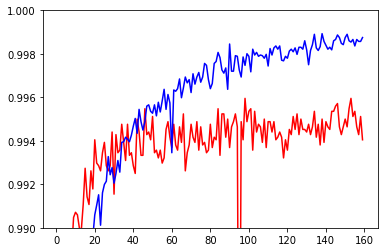

In [20]:
def test(Nfilters, dropout, batchsize):
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=3, strides=1, padding="same", input_shape=(28, 28, 1), 
                     activation='relu')) # 3x3   Param = 9 Nfilters
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())  # 5x5   Param = 9 Nfilters^2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu')) # 7x7
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 14x14
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="same", activation='relu')) # 11x11
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 13x13
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 15x15
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 7x7
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 19x19
    model.add(BatchNormalization())
    
    # I would like total size 4x4 by having 1 zero-padding. It needs same padding.
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')) # total size 4x4
    
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 2x2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu'))  
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 1x1
    model.add(Flatten())
    model.add(Dropout(dropout))
    model.add(Dense(Nfilters, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    filename = "SavedModel_D.hdf5"

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filename, monitor='val_acc', save_best_only=True, save_weights_only=True, 
                                                     period=1)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    return history.history

history = test(30, 0.2, 256)
print(max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

In [26]:
# I got 0.995952380952, 34 errors
# My submission on Kaggle scored  0.99400 which is an improvement. That means 168 errors on 28,000.

# Return model
def testModel(Nfilters, dropout, batchsize):
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=3, strides=1, padding="same", input_shape=(28, 28, 1), 
                     activation='relu')) # 3x3   Param = 9 Nfilters
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())  # 5x5   Param = 9 Nfilters^2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu')) # 7x7
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 14x14
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="same", activation='relu')) # 11x11
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 13x13
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 15x15
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 7x7
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 19x19
    model.add(BatchNormalization())
    
    # I would like total size 4x4 by having 1 zero-padding. It needs same padding.
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')) # total size 4x4
    
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 2x2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu'))  
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # total size 1x1
    model.add(Flatten())
    model.add(Dropout(dropout))
    model.add(Dense(Nfilters, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    return model

model = testModel(30, 0.2, 256)

# Test on Kaggle
filename = 'SavedModel_D.hdf5'
model.load_weights(filename)
ans = argmax(model.predict(xtest), axis=-1)
ans_s = pd.Series(data=ans,index=range(1,28001)).rename('Label')
filename = 'Result'
ans_s.to_csv(path=filename,header=True,index_label='ImageId')

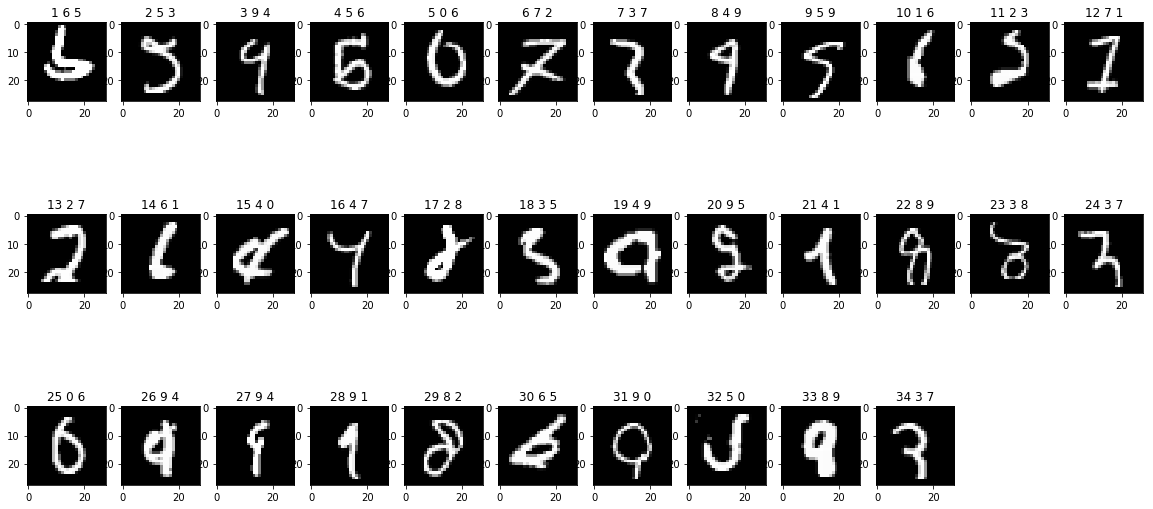

In [35]:
# Plot mistakes
ans = argmax(model.predict(X_test), axis=-1) # X_test is validation while xtest is Kaggle test set
fig = plt.figure(figsize=(20,10))
xtr = X_test.reshape(8400,28,28)
i = 0
j = 0
y_test_num = argmax(y_test, axis=-1)
for image in xtr:
    if ans[i] != y_test_num[i]:
        j += 1
        fig.add_subplot(3,12,j)
        plt.imshow(image, cmap='gray')
        plt.title(str(j) + ' '+ str(y_test_num[i]) + ' ' + str(ans[i]))
    i += 1

# So many of those errors are due to poor writing: 1, 4, 7, 11, 12, 17, 18, 19, 20, 21, 23, 28, 32, 33 
# Mistakes that are hard but could be good: 2, 3, 8, 9, 13, 14 (though very close from 10), 25, 26, 27, 30, 31, 34
# Unaceptable mistakes are: 5, 6, 10, 15, 16, 22, 24, 29

# I should maybe repeat those examples with slight modification. But I should do it for the training data rather than validation.

Train on 33600 samples, validate on 8400 samples
Epoch 1/1000
63s - loss: 2.1721 - acc: 0.1777 - val_loss: 2.5632 - val_acc: 0.1082
Epoch 2/1000
58s - loss: 2.0228 - acc: 0.2185 - val_loss: 2.0270 - val_acc: 0.2993
Epoch 3/1000
59s - loss: 1.7538 - acc: 0.3210 - val_loss: 1.7181 - val_acc: 0.3814
Epoch 4/1000
58s - loss: 1.5953 - acc: 0.3670 - val_loss: 1.6261 - val_acc: 0.3996
Epoch 5/1000
58s - loss: 1.3879 - acc: 0.4723 - val_loss: 1.1362 - val_acc: 0.5888
Epoch 6/1000
58s - loss: 1.2583 - acc: 0.5146 - val_loss: 0.9812 - val_acc: 0.6642
Epoch 7/1000
58s - loss: 0.9786 - acc: 0.6449 - val_loss: 0.7397 - val_acc: 0.7614
Epoch 8/1000
58s - loss: 0.7151 - acc: 0.7350 - val_loss: 0.2031 - val_acc: 0.9557
Epoch 9/1000
58s - loss: 0.4213 - acc: 0.8385 - val_loss: 0.0785 - val_acc: 0.9838
Epoch 10/1000
58s - loss: 0.2673 - acc: 0.9132 - val_loss: 0.0570 - val_acc: 0.9888
Epoch 11/1000
58s - loss: 0.1692 - acc: 0.9528 - val_loss: 0.0933 - val_acc: 0.9800
Epoch 12/1000
58s - loss: 0.1419 - a

(0.99, 1)

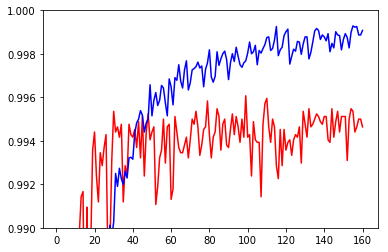

In [39]:
# Prblem might be due to layers name: https://github.com/fchollet/keras/issues/3974

# Create custom pooling
import tensorflow as tf
from keras.layers.core import Lambda
from keras import backend as K
def max_avg_pool2d(x):
    max_x =  tf.nn.pool(x, window_shape=(2, 2), strides=(2, 2),padding="SAME",pooling_type="MAX")
    avg_x =  tf.nn.pool(x, window_shape=(2, 2), strides=(2, 2),padding="SAME",pooling_type="AVG")
    return K.concatenate([max_x, avg_x], axis=1) # concatenate on channel
#def max_avg_pool2d_output_shape(input_shape):
#    shape = list(input_shape)
#    shape[3] *= 2
#    shape[2] = int(np.ceil(shape[2]/2)) # tf.cast(tf.ceil(shape[2]/2),tf.int32)
#    shape[1] = int(np.ceil(shape[1]/2)) # tf.cast(tf.ceil(shape[1]/2),tf.int32)
#    return tuple(shape)
#max_avg = Lambda(max_avg_pool2d, output_shape=max_avg_pool2d_output_shape)
# They say: output_shape is auto-inferred when using TensorFlow
# max_avg = Lambda(max_avg_pool2d)

def test(Nfilters, dropout, batchsize):
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=3, strides=1, padding="same", input_shape=(28, 28, 1), 
                     activation='relu')) # 3x3   Param = 9 Nfilters
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())  # 5x5   Param = 9 Nfilters^2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu')) # 7x7
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 14x14
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="same", activation='relu')) # 11x11
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 13x13
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 15x15
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 7x7
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 19x19
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 4x4
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 2x2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 1x1
    model.add(Flatten())
    model.add(Dropout(dropout))
    model.add(Dense(Nfilters, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    filename = "SavedModel_F.hdf5"

    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filename, monitor='val_acc', save_best_only=True, save_weights_only=True, 
                                                     period=1)]

    history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
                validation_data=(X_test, y_test))
    
    return history.history

history = test(30, 0.2, 256)
print(max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

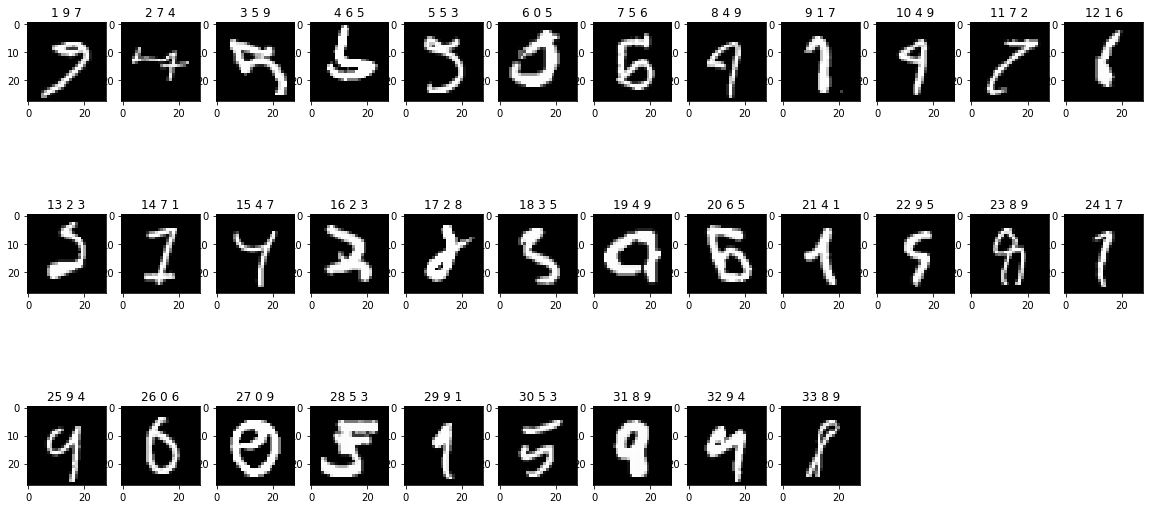

In [40]:
# Difference between two last run is only the pooling: AVG+MAX to MAX
# I got 0.996071428571, 33 errors (it's only 1 better and took a lot more time)
# My submission on Kaggle scored  0.99485 which is an improvement. That means 144 errors on 28,000.

# Return model
def testModel(Nfilters, dropout, batchsize):
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=3, strides=1, padding="same", input_shape=(28, 28, 1), 
                     activation='relu')) # 3x3   Param = 9 Nfilters
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu'))
    model.add(BatchNormalization())  # 5x5   Param = 9 Nfilters^2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= Nfilters, kernel_size=3, padding="same", activation='relu')) # 7x7
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 14x14
    model.add(Dropout(dropout))
    model.add(Conv2D(filters= 2*Nfilters, kernel_size=3, padding="same", activation='relu')) # 11x11
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 13x13
    model.add(BatchNormalization())  
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 15x15
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 7x7
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="same", activation='relu'))  # 19x19
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 4x4
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 2x2
    model.add(Dropout(dropout))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=1, padding="same", activation='relu')) 
    model.add(BatchNormalization())
    model.add(Lambda(max_avg_pool2d)) # 1x1
    model.add(Flatten())
    model.add(Dropout(dropout))
    model.add(Dense(Nfilters, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    
    return model

model = testModel(30, 0.2, 256)

# Test on Kaggle
filename = 'SavedModel_F.hdf5'
model.load_weights(filename)
ans = argmax(model.predict(xtest), axis=-1)
ans_s = pd.Series(data=ans,index=range(1,28001)).rename('Label')
filename = 'Result'
ans_s.to_csv(path=filename,header=True,index_label='ImageId')

# Plot mistakes
ans = argmax(model.predict(X_test), axis=-1) # X_test is validation while xtest is Kaggle test set
fig = plt.figure(figsize=(20,10))
xtr = X_test.reshape(8400,28,28)
i = 0
j = 0
y_test_num = argmax(y_test, axis=-1)
for image in xtr:
    if ans[i] != y_test_num[i]:
        j += 1
        fig.add_subplot(3,12,j)
        plt.imshow(image, cmap='gray')
        plt.title(str(j) + ' '+ str(y_test_num[i]) + ' ' + str(ans[i]))
    i += 1

In [ ]:
Data augmentation

https://arxiv.org/pdf/1609.08764.pdf
Good to augment classes with less examples than other to make them equal.
Augment by translation, shearing, rotation and elastic distortions.

The state of the art 0.35% on MNIST has been obtained by creating new data for each epoch, so to never 
reuse the exact same image. It overcame overfitting. It's called Data Wrapping.

Elastic transformation are given by displacing pixels with Rw = Ro + alpha u
where Rw is the new position, Ro the previous position, alpha is parameter that should be less than 8
for MNIST label to be preserved. u(x,y) is a normalized random displacement field.
At low alpha, it makes the image look blury while at high alpha it's very blury and deformed.
They got good result with alpha=1.2.


C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (33600, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


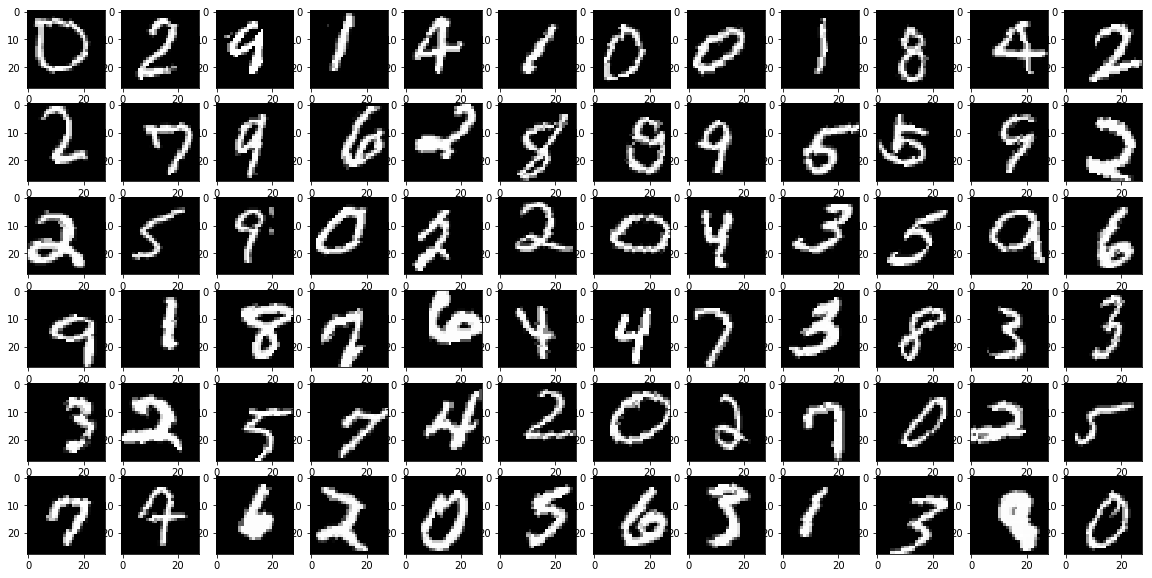

In [6]:
from keras.preprocessing.image import ImageDataGenerator
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
# It is useful to augment data during training to get new data indefinitely.
# It does add some time cost during training
# https://keras.io/preprocessing/image/
datagen = ImageDataGenerator(
    rotation_range = 10, # Int Degree range. It might be useful a little, but not too much
    width_shift_range=0.15, height_shift_range=0.1, # Float fraction of total width
    shear_range = 0.2, # Float. Shear Intensity
    zoom_range = 0.1
    )
datagen.fit(X_train)

# Show new images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=256):
    fig = plt.figure(figsize=(20,10))
    for i in range(72):
        fig.add_subplot(6,12,i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.show()
    break
    
# All those numbers can be identified. So the transformation aren't too big. One of them is a mixed between 0 and 9.
# Number can be close from border without touching it, so the shift seems to be good.

Increase rotation


C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (33600, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


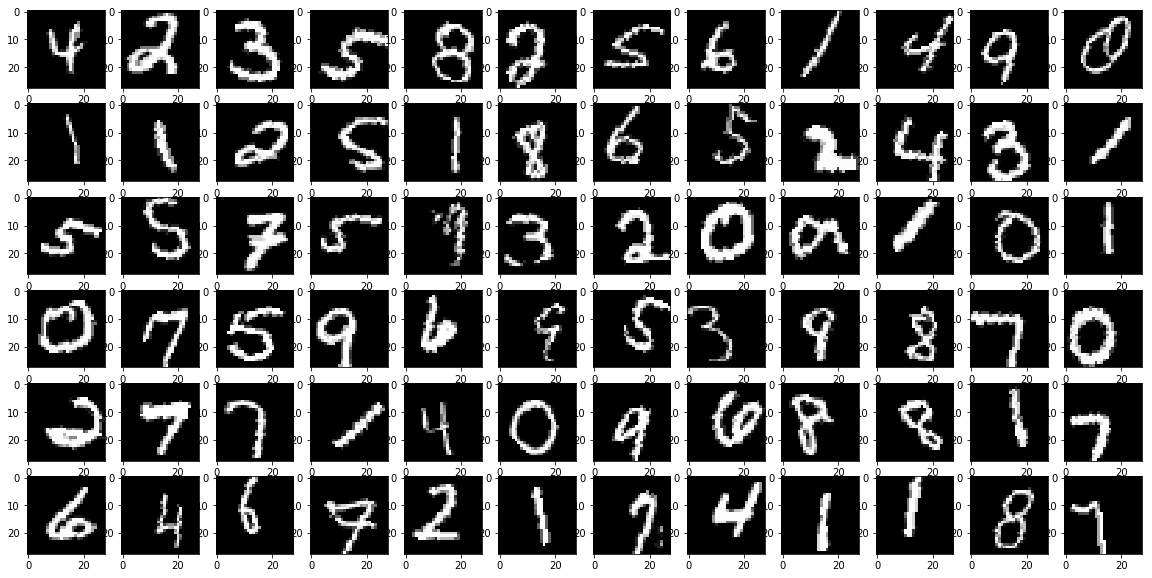

Increase shear


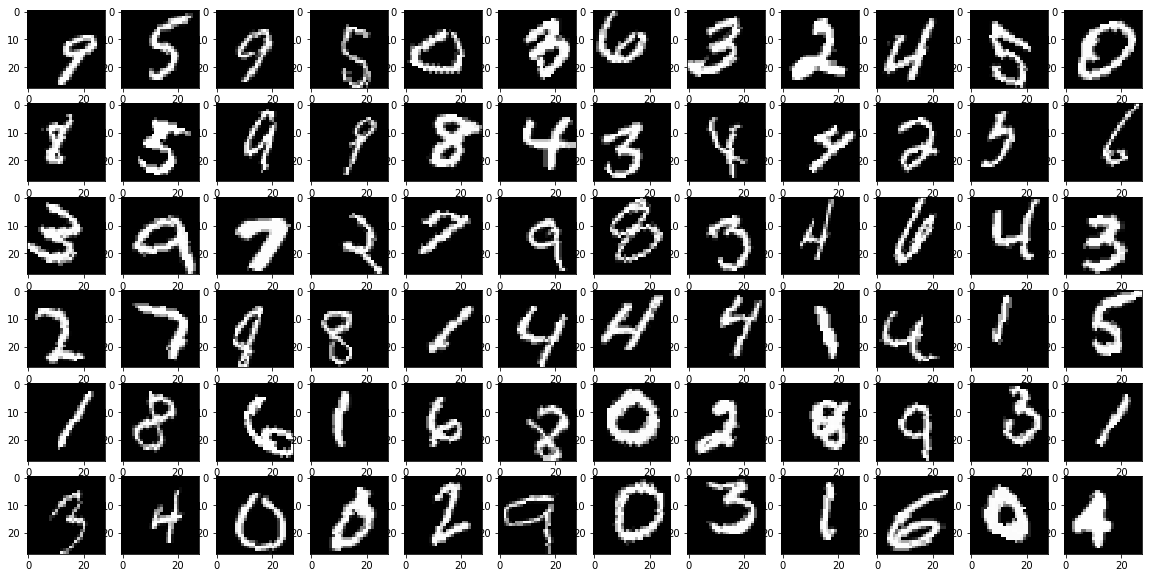

Increase zoom


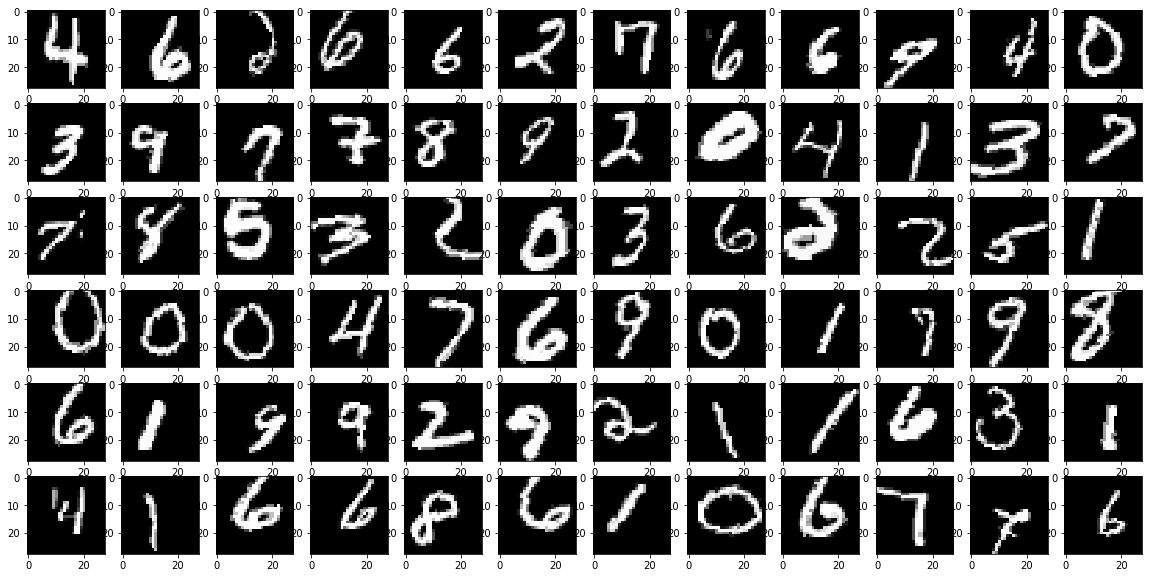

In [9]:
print('Increase rotation')

datagen = ImageDataGenerator(
    rotation_range = 20, # Int Degree range. It might be useful a little, but not too much
    width_shift_range=0.15, height_shift_range=0.1, # Float fraction of total width
    shear_range = 0.2, # Float. Shear Intensity
    zoom_range = 0.1
    )
datagen.fit(X_train)

# Show new images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=256):
    fig = plt.figure(figsize=(20,10))
    for i in range(72):
        fig.add_subplot(6,12,i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.show()
    break
    
print('Increase shear')

datagen = ImageDataGenerator(
    rotation_range = 10, # Int Degree range. It might be useful a little, but not too much
    width_shift_range=0.15, height_shift_range=0.1, # Float fraction of total width
    shear_range = 0.4, # Float. Shear Intensity
    zoom_range = 0.1
    )
datagen.fit(X_train)

# Show new images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=256):
    fig = plt.figure(figsize=(20,10))
    for i in range(72):
        fig.add_subplot(6,12,i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.show()
    break
    
print('Increase zoom')

datagen = ImageDataGenerator(
    rotation_range = 10, # Int Degree range. It might be useful a little, but not too much
    width_shift_range=0.15, height_shift_range=0.1, # Float fraction of total width
    shear_range = 0.2, # Float. Shear Intensity
    zoom_range = 0.2
    )
datagen.fit(X_train)

# Show new images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=256):
    fig = plt.figure(figsize=(20,10))
    for i in range(72):
        fig.add_subplot(6,12,i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.show()
    break
    
    # Increase rotation: Some image are hard to identify, but it doesn't seem to be due to rotation.
    # Increase shear: Some images are hard to identify.
    # Increase zoom : The image which have been reduced are hard to identify, probably because they are sheared too.

C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (33600, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


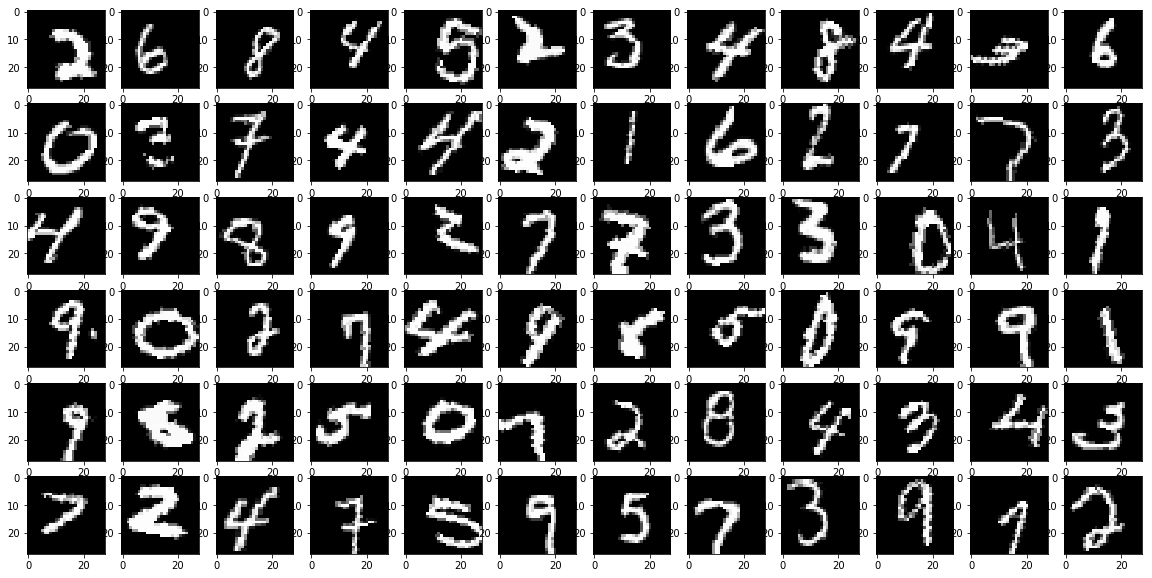

In [10]:
# Have smaller shear and bigger rotation and zoom is maybe the best.

datagen = ImageDataGenerator(
    rotation_range = 20, # Int Degree range. It might be useful a little, but not too much
    width_shift_range=0.15, height_shift_range=0.1, # Float fraction of total width
    shear_range = 0.1, # Float. Shear Intensity
    zoom_range = 0.2
    )
datagen.fit(X_train)

# Show new images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=256):
    fig = plt.figure(figsize=(20,10))
    for i in range(72):
        fig.add_subplot(6,12,i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
    plt.show()
    break

C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (33600, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')
C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\__main__.py:76: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1000, validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=2, steps_per_epoch=131)`


Epoch 1/1000
15s - loss: 2.8791 - acc: 0.2151 - val_loss: 2.4855 - val_acc: 0.0982
Epoch 2/1000
11s - loss: 1.2698 - acc: 0.5667 - val_loss: 3.2064 - val_acc: 0.1695
Epoch 3/1000
11s - loss: 0.8121 - acc: 0.7336 - val_loss: 0.6778 - val_acc: 0.7794
Epoch 4/1000
11s - loss: 0.6022 - acc: 0.8065 - val_loss: 0.2916 - val_acc: 0.9086
Epoch 5/1000
11s - loss: 0.4833 - acc: 0.8480 - val_loss: 0.1760 - val_acc: 0.9449
Epoch 6/1000
11s - loss: 0.3915 - acc: 0.8811 - val_loss: 0.1339 - val_acc: 0.9594
Epoch 7/1000
11s - loss: 0.3256 - acc: 0.8996 - val_loss: 0.1317 - val_acc: 0.9617
Epoch 8/1000
11s - loss: 0.2896 - acc: 0.9122 - val_loss: 0.1274 - val_acc: 0.9643
Epoch 9/1000
11s - loss: 0.2516 - acc: 0.9241 - val_loss: 0.0909 - val_acc: 0.9739
Epoch 10/1000
11s - loss: 0.2220 - acc: 0.9336 - val_loss: 0.0810 - val_acc: 0.9764
Epoch 11/1000
10s - loss: 0.2154 - acc: 0.9352 - val_loss: 0.0902 - val_acc: 0.9749
Epoch 12/1000
11s - loss: 0.1933 - acc: 0.9433 - val_loss: 0.0732 - val_acc: 0.9795
E

(0.99, 1)

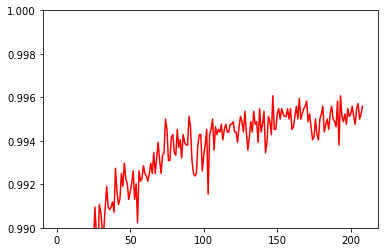

In [14]:
datagen = ImageDataGenerator(
    rotation_range = 20, # Int Degree range. It might be useful a little, but not too much
    shear_range = 0.1, # Float. Shear Intensity
    zoom_range = 0.2
    )
datagen.fit(X_train)

# To fit a model, one must use fit_generator


# Let's test on a fast model the one which got me :
# Epoch 89/100
# 13s - loss: 0.0246 - acc: 0.9932 - val_loss: 0.0171 - val_acc: 0.9950
# Though I will use my higher patience, batchsize and epoch number that I'm now always using.
# This fast model will allow me to see faster whether this image generation is good.

# !!! I'm removing the shift as this model use valid padding which will probably not do well if the digit is not centered.

def test(Nfilters, dropoutConv, dropoutEnd, batchsize):
    # number of paramater for 3x3 is 9*Number_filters*Previous_number_filters.
    # For a 5x5, it would be 25*Number_filters*Previous_number_filters which is 25/18 times bigger than 2 3x3 following each 
    # other
    
    # For the 1st conv, Previous_number_filters=1, so
    # 3x3 3x3 = 9 N1 (1+N2)   5x5 = 25 N2     -> 3x3 better only if N1 < 25/9 ~ 2.7   in limit N2/(1+N2)->1
    # 5x5 3x3 = 25 N1 + 9 N1 N2    7x7 = 49 N2 -> 5x5 better only if N1 < 49 N2 / (25 + 9 N2) ~ 49/9 ~ 5.4
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=8, strides=2, padding="valid", input_shape=(28, 28, 1),  
                     # kernel 8x8, total size 11x11, Rep size: 121 Nfilters. It can be good to expand at first, so NFilters > 6
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(1.4 * Nfilters), kernel_size=3, padding="valid", activation='relu'))
    model.add(BatchNormalization())  # kernel ~12x12, total size 9x9 Rep size: 113 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2 * Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())   # kernel ~14x14, total size 7x7  Rep size: 98 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(2.8 * Nfilters), kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())  # kernel ~16x16, total size 5x5 Rep size: 70 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 36 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 18 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 9 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(4 * Nfilters, activation='relu')) # number parameter is 4 Nfilters^2*9  because the space is 3x3
                                                # Rep size: 4 Nfilters
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax')) # number parameters is 40 Nfilters

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    filenameacc = "SavedModel_Aacc.hdf5"
    filenameloss = "SavedModel_Aloss.hdf5"
    callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filenameacc, monitor='val_acc', save_best_only=True, save_weights_only=True,
                                 period=1),
                 ModelCheckpoint(filepath=filenameloss, monitor='val_loss', save_best_only=True, save_weights_only=True,
                                 period=1)]

    #history = model.fit(X_train, y_train, epochs=1000, batch_size=batchsize,verbose=2,callbacks=callbacks,shuffle=True, 
    #            validation_data=(X_test, y_test))
    
    history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batchsize),
                                  samples_per_epoch=len(X_train), epochs=1000,
                                  verbose=2,callbacks=callbacks, 
                                  validation_data=(X_test, y_test)
                                 )
    return history.history

history = test(50, 0.5, 0.6, 256)
print(max(history['val_acc']), 1 - max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

accuracy
loss


ValueError: num must be 1 <= num <= 36, not 37

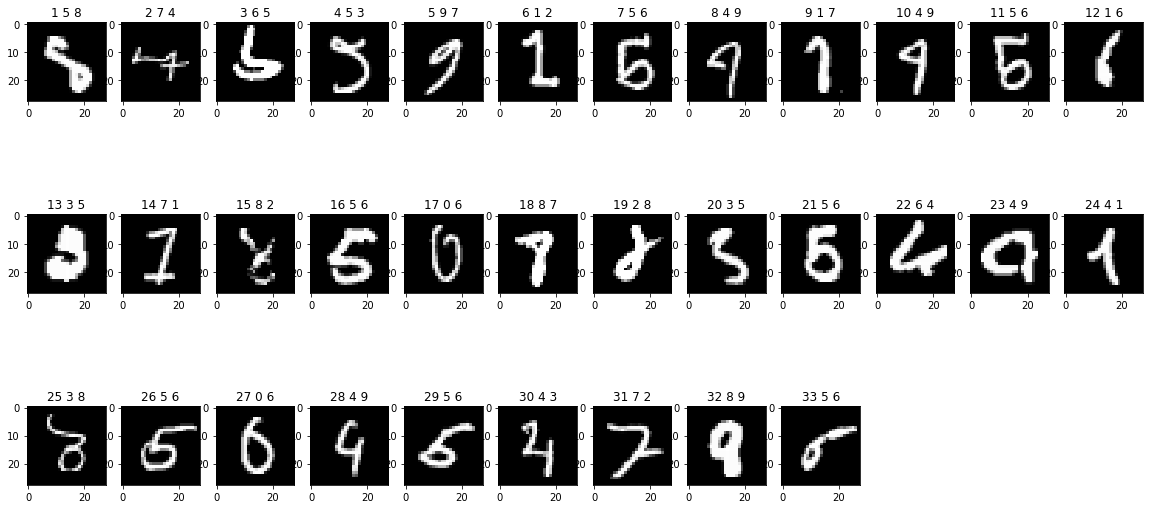

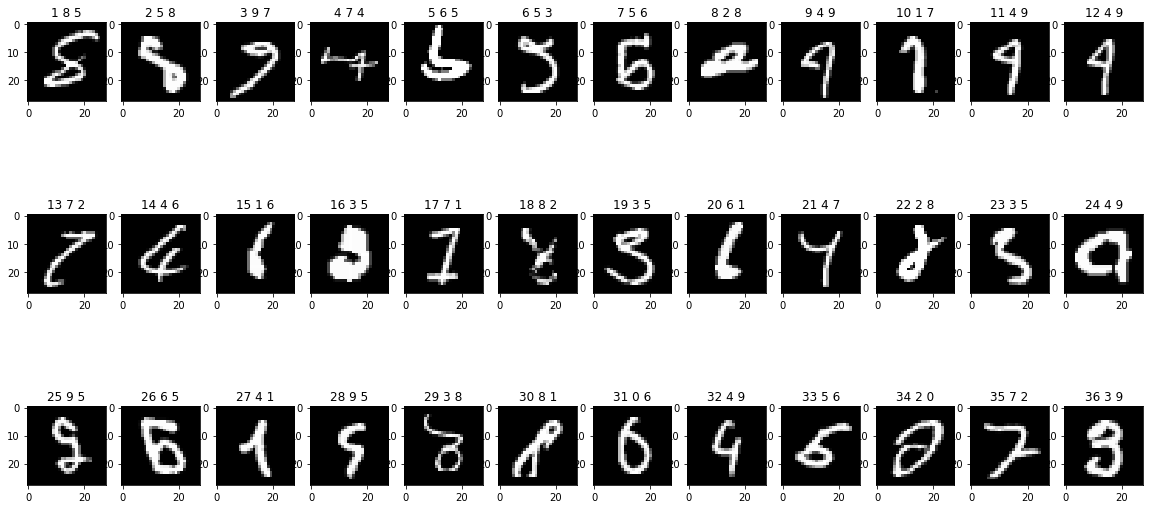

In [15]:
# I got 0.996071428571, 33 errors with less time than previous run.
# So it seems that my data augmentation was a good idea.

# For the one with the best val_acc
# My submission on Kaggle scored 0.99442. That means 156 errors on 28,000.

# For the one with the best val_loss
# My submission on Kaggle scored 0.99371. That means 176 errors on 28,000.
# So for this case, it seems than optimizing accuracy is better than loss.

# Return model
def testModel(Nfilters, dropoutConv, dropoutEnd, batchsize):
    
    model = Sequential() # 28x28, Rep size: 784
    model.add(Conv2D(filters=Nfilters, kernel_size=8, strides=2, padding="valid", input_shape=(28, 28, 1),  
                     # kernel 8x8, total size 11x11, Rep size: 121 Nfilters. It can be good to expand at first, so NFilters > 6
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(1.4 * Nfilters), kernel_size=3, padding="valid", activation='relu'))
    model.add(BatchNormalization())  # kernel ~12x12, total size 9x9 Rep size: 113 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= 2 * Nfilters, kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())   # kernel ~14x14, total size 7x7  Rep size: 98 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters= int(2.8 * Nfilters), kernel_size=3, padding="valid", activation='relu')) 
    model.add(BatchNormalization())  # kernel ~16x16, total size 5x5 Rep size: 70 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=4*Nfilters, kernel_size=3, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 36 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=2*Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 18 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Conv2D(filters=Nfilters, kernel_size=1, padding="valid", activation='relu'))  
    model.add(BatchNormalization())  # kernel ~18x18, total size 3x3 Rep size: 9 Nfilters
    model.add(Dropout(dropoutConv))
    model.add(Flatten())
    model.add(Dense(4 * Nfilters, activation='relu')) # number parameter is 4 Nfilters^2*9  because the space is 3x3
                                                # Rep size: 4 Nfilters
    model.add(Dropout(dropoutEnd))
    model.add(Dense(10, activation='softmax')) # number parameters is 40 Nfilters
    
    return model

model = testModel(50, 0.5, 0.6, 256)

# Test on Kaggle with the model with the best accuracy
filename = 'SavedModel_Aacc.hdf5'
model.load_weights(filename)
ans = argmax(model.predict(xtest), axis=-1)
ans_s = pd.Series(data=ans,index=range(1,28001)).rename('Label')
filename = 'ResultAacc'
ans_s.to_csv(path=filename,header=True,index_label='ImageId')

# Plot mistakes
ans = argmax(model.predict(X_test), axis=-1) # X_test is validation while xtest is Kaggle test set
fig = plt.figure(figsize=(20,10))
xtr = X_test.reshape(8400,28,28)
i = 0
j = 0
y_test_num = argmax(y_test, axis=-1)
for image in xtr:
    if ans[i] != y_test_num[i]:
        j += 1
        fig.add_subplot(3,12,j)
        plt.imshow(image, cmap='gray')
        plt.title(str(j) + ' '+ str(y_test_num[i]) + ' ' + str(ans[i]))
    i += 1
    
    
# Test on Kaggle with the model with the best loss
filename = 'SavedModel_Aloss.hdf5'
model.load_weights(filename)
ans = argmax(model.predict(xtest), axis=-1)
ans_s = pd.Series(data=ans,index=range(1,28001)).rename('Label')
filename = 'ResultAloss'
ans_s.to_csv(path=filename,header=True,index_label='ImageId')

# Plot mistakes
ans = argmax(model.predict(X_test), axis=-1) # X_test is validation while xtest is Kaggle test set
fig = plt.figure(figsize=(20,10))
xtr = X_test.reshape(8400,28,28)
i = 0
j = 0
y_test_num = argmax(y_test, axis=-1)
for image in xtr:
    if ans[i] != y_test_num[i]:
        j += 1
        fig.add_subplot(3,12,j)
        plt.imshow(image, cmap='gray')
        plt.title(str(j) + ' '+ str(y_test_num[i]) + ' ' + str(ans[i]))
    i += 1

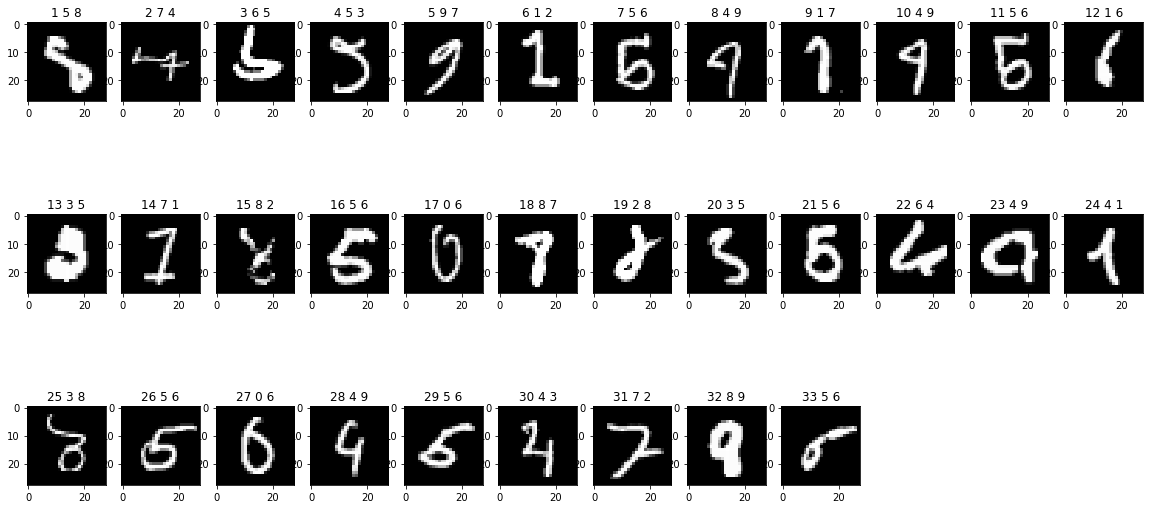

In [17]:
# Test on Kaggle with the model with the best accuracy
model = testModel(50, 0.5, 0.6, 256)
filename = 'SavedModel_Aacc.hdf5'
model.load_weights(filename)
ans = argmax(model.predict(X_test), axis=-1) # X_test is validation while xtest is Kaggle test set
fig = plt.figure(figsize=(20,10))
xtr = X_test.reshape(8400,28,28)
i = 0
j = 0
y_test_num = argmax(y_test, axis=-1)
for image in xtr:
    if ans[i] != y_test_num[i]:
        j += 1
        fig.add_subplot(3,12,j)
        plt.imshow(image, cmap='gray')
        plt.title(str(j) + ' '+ str(y_test_num[i]) + ' ' + str(ans[i]))
        if j == 36: break
    i += 1
    
# Most of them are errors that are very hard to find. It seems however that the network becomes bad to see 0, 1, 4.

In [30]:
# Look how many examples of each number we have
total = 0
y_train_num = argmax(y_train, axis=-1)
for number in range(10):
    numberarray = np.full((len(y_train_num)), number)
    tmp = y_train_num == numberarray
    res = np.sum(tmp)/33600
    print(number, res)
    total += res
print(total)

# So there is already more ones.
# I'm not sure if it's a good idea to increase the number of 0, 1, 4.

0 0.0986904761905
1 0.112351190476
2 0.0991369047619
3 0.101607142857
4 0.0962202380952
5 0.0920535714286
6 0.0997619047619
7 0.104404761905
8 0.0960714285714
9 0.0997023809524
1.0


C:\Users\nicol\Anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\__main__.py:76: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1000, validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=2, steps_per_epoch=131)`


Epoch 1/1000
20s - loss: 1.6578 - acc: 0.5026 - val_loss: 1.9801 - val_acc: 0.3052
Epoch 2/1000
12s - loss: 0.5521 - acc: 0.8238 - val_loss: 2.3015 - val_acc: 0.4686
Epoch 3/1000
12s - loss: 0.3372 - acc: 0.8947 - val_loss: 1.0495 - val_acc: 0.6918
Epoch 4/1000
13s - loss: 0.2504 - acc: 0.9226 - val_loss: 0.2217 - val_acc: 0.9352
Epoch 5/1000
13s - loss: 0.1997 - acc: 0.9382 - val_loss: 0.0783 - val_acc: 0.9762
Epoch 6/1000
12s - loss: 0.1672 - acc: 0.9492 - val_loss: 0.0623 - val_acc: 0.9810
Epoch 7/1000
13s - loss: 0.1504 - acc: 0.9545 - val_loss: 0.0573 - val_acc: 0.9843
Epoch 8/1000
12s - loss: 0.1421 - acc: 0.9574 - val_loss: 0.0510 - val_acc: 0.9867
Epoch 9/1000
12s - loss: 0.1287 - acc: 0.9603 - val_loss: 0.0428 - val_acc: 0.9877
Epoch 10/1000
12s - loss: 0.1148 - acc: 0.9646 - val_loss: 0.0460 - val_acc: 0.9870
Epoch 11/1000
12s - loss: 0.1118 - acc: 0.9653 - val_loss: 0.0396 - val_acc: 0.9880
Epoch 12/1000
12s - loss: 0.1026 - acc: 0.9685 - val_loss: 0.0463 - val_acc: 0.9867
E

(0.99, 1)

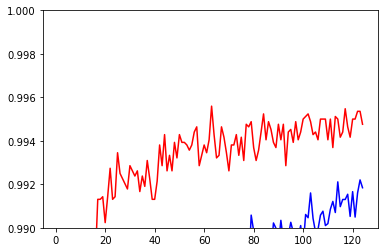

In [31]:
# Increase number of filters and reduce dropout it seems to underfit.
history = test(60, 0.4, 0.5, 256)
print(max(history['val_acc']))

xaxis=range(1,len(history['val_acc'])+1)
plt.plot(xaxis, history['val_acc'], 'r', xaxis, history['acc'], 'b')
plt.ylim((0.99,1))

In [ ]:
# I should save the model with best val_acc and the model with best val_loss to compare them and see what generalize better to
# the test set.

filenameacc = "SavedModel_Aacc.hdf5"
filenameloss = "SavedModel_Aloss.hdf5"
callbacks = [EarlyStopping(monitor='val_acc', min_delta=0., patience=60),
                 ModelCheckpoint(filepath=filenameacc, monitor='val_acc', save_best_only=True, save_weights_only=True, 
                                                     period=1),
            ModelCheckpoint(filepath=filenameloss, monitor='val_loss', save_best_only=True, save_weights_only=True, 
                                                     period=1)]